<a href="https://colab.research.google.com/github/a1ip/ML-for-applied-tasks/blob/main/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_4_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%D0%9D%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейные модели регрессии

Далее нам потребуется вспомнить некоторые основные понятия из курса математики. Они будут кратко описаны в данном разделе. Более подробно можно почитать в [дополнительных материалах](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G?hl=ru).

Нам потребуются следующие понятия: 
1. [Векторы и операции над ними](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=pcSZI4RdFton).
2. [Скалярное произведение двух векторов](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=OXZed9NEynaD).
3. [Уравнение прямой на плоскости, гиперплоскость](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=1qeoxXvxWgZm).
4. [Матрицы и их свойства](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=cwZ-wrxO68oX).

## Напоминание
________________________
На вводной лекции мы обсуждали, что задачи машинного обучения с учителем обычно делятся на ряд подзадач, основными из которых являются задачи классификации и регрессии. Задача классификации состоит в поиске алгоритма, способного распределить объекты из тестовой выборки по классам, которых может быть лишь конечное число. 

В задаче регрессии мы не ограничиваем себя заданным заранее набором обозначеных классов, предсказание представляет собой ожидаемое значение некоторого свойства объекта, которое может быть выражено в виде некотрого числа в определенном диапазоне.

Например, мы можем предсказывать среднее время ожидания автобуса на остановке по описанию района города, температуру воздуха или воды по описанию географического положения, содержание углеводов в продукте по описанию его состава. Все эти характеристики представляют собой некоторые численные значения, выбранные из определенного разумного диапазона.

Прошлые лекции мы посвятили разговору о задачах классификации, лишь мельком обратив внимание на применение метрических алгоритмов в задачах регресии. Сегодняшняя лекция будет полностью посвящена задаче регрессии. Речь пойдет о применении линейных моделей для решения задачи регрессии.
________________________


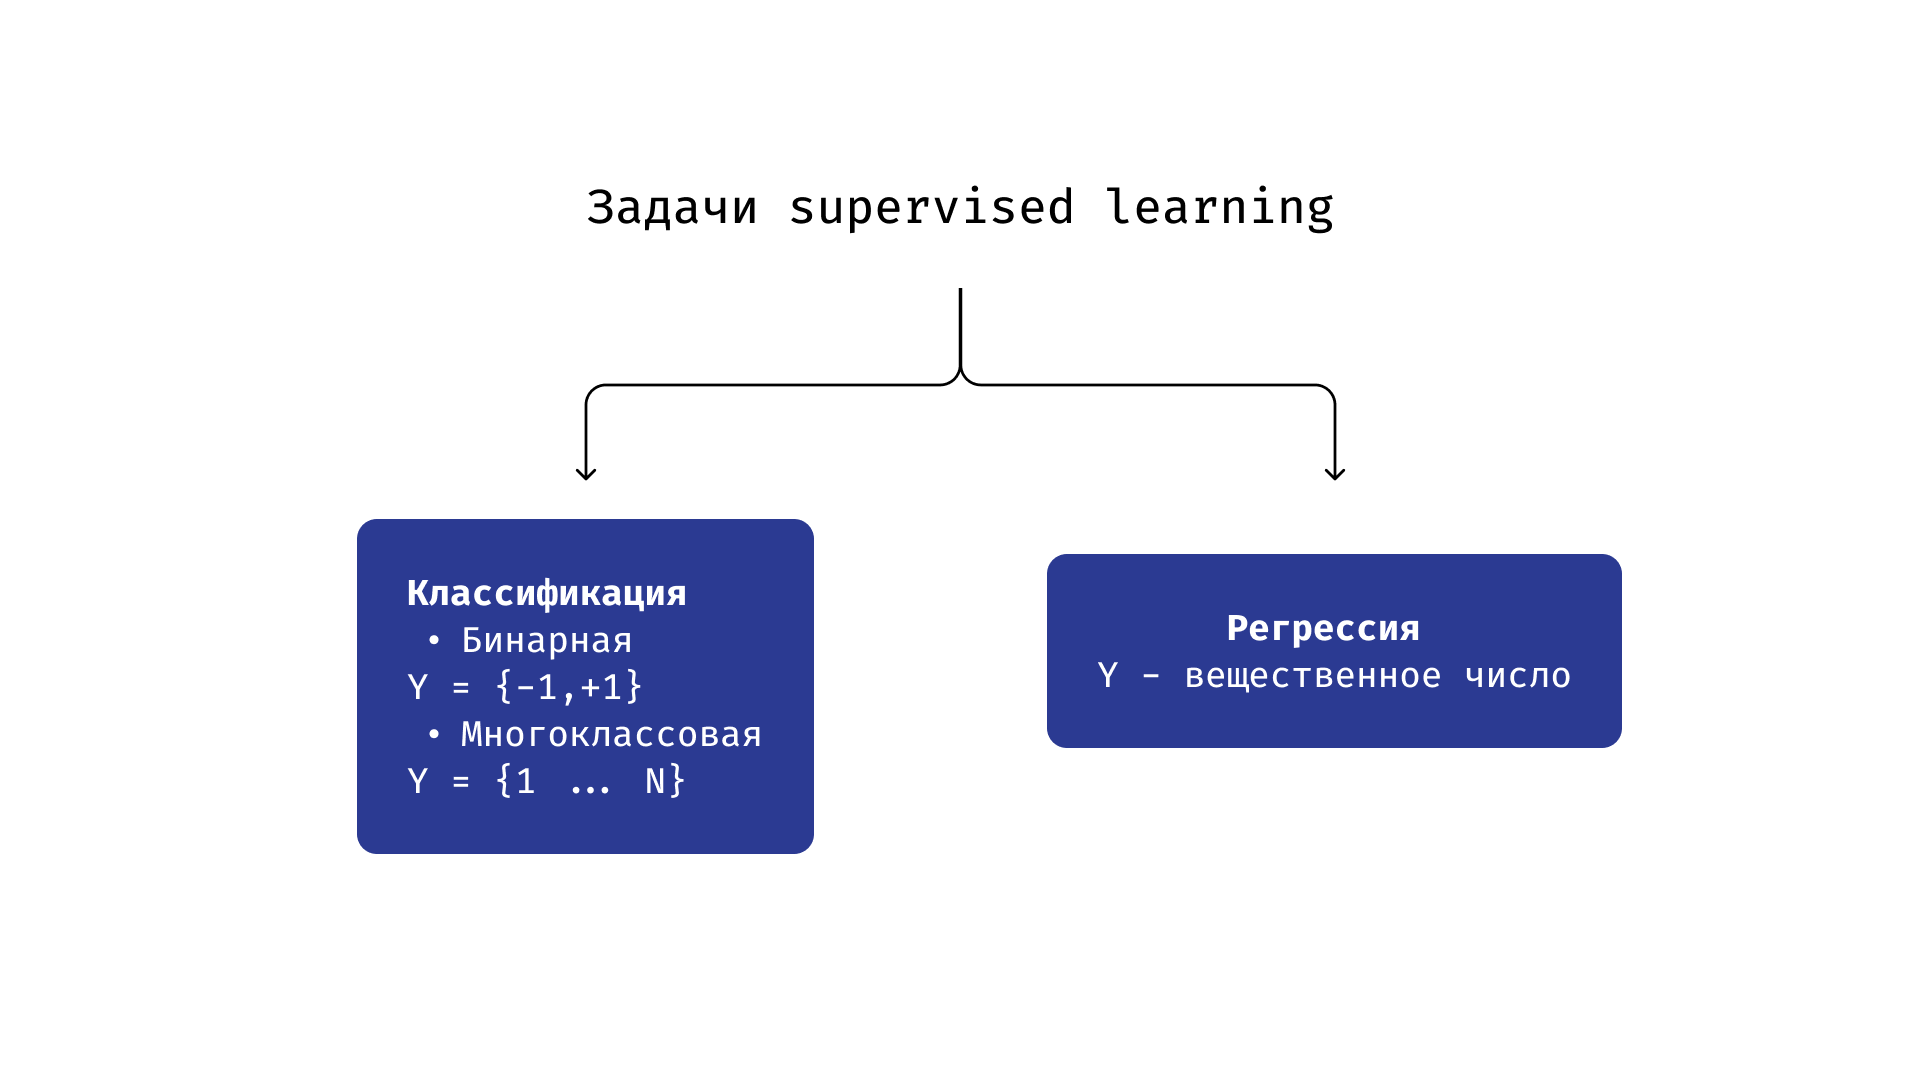

На прошлой лекции мы описали модель обобщенного метрического классификатора. Наша задача состояла в поиске наилучшей разделяющей [гиперплоскости](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=1qeoxXvxWgZm), способнной отделить один из двух представленных классов от другого.

Разделяющая гиперплоскость представляла собой поверхность, задаваемую множеством точек, которые являются решением уравнения $f_w(x) = <\vec{w},x> + {w_0} = 0$ с некоторым [вектором](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=pcSZI4RdFton) параметров, которые мы подбирали при помощи решения задачи минимизации ошибки. Эта гиперплоскость строилась в пространстве признакового описания объекта, то есть каждая координата в этом пространстве **задавала некоторый признак объекта**, некоторую данную об объекте информацию.

В задаче регрессии мы должны предсказать некоторое свойство объекта, поэтому работать мы будем в пространстве, где часть координат все так же задаёт признаковое описание объекта, а часть задаёт свойства, которые мы хотим предсказать. 


Сегодня мы также будем строить некоторую гиперплоскость, однако, на этот раз мы не будем называть ее разделяющей, поскольку цель ее построения состоит не в разделении пространства на 2 подпространства, а в **предсказании** некоторого прогнозируемого значения. Но давайте обо всем по порядку.

# Одномерный случай линейной регрессии.

Представьте, что вы - экспериментатор. Например, вы - физик или механик, который только что изобрел новый материал. Вы рады своему открытию, ожидаете множество премий и всемирного признания ваших достижений. Но прежде чем почивать на лаврах, вы должны представить миру результат своей работы, а значит и подробно описать свойства изобретенного вами материала.

Сегодня ваша задача - измерить коэффициент упругости этого материала. Вы, конечно, помните школьный закон Гука, связывающий приложенную силу и растяжение в случае одноосного эксперимента: $$F = k𝛥x$$
$k$ - тот самый коэффициент, который вы пытаетесь найти. 

Казалось бы, все очень просто. Нужно всего лишь взять набор гирь известной массы и линейку, закрепить образец, начать вешать гири, а затем измерять получившееся удлинение $𝛥x$. Тогда, имея в распоряжении набор измерений, представляющих собой пары $({F_i}, {𝛥x_i})$, вы без труда найдете коэффициент $k = \frac{F_i}{𝛥x_i}$. Причем, согласно теории, вы можете взять любой $i$ (то есть любую пару измерений), а отношение от этого измениться не должно.

Это значит, что в теории $F$ зависит от $𝛥x$ **линейно**, то есть если вы нарисуете график этой зависимости, этот график будет просто прямой линией.



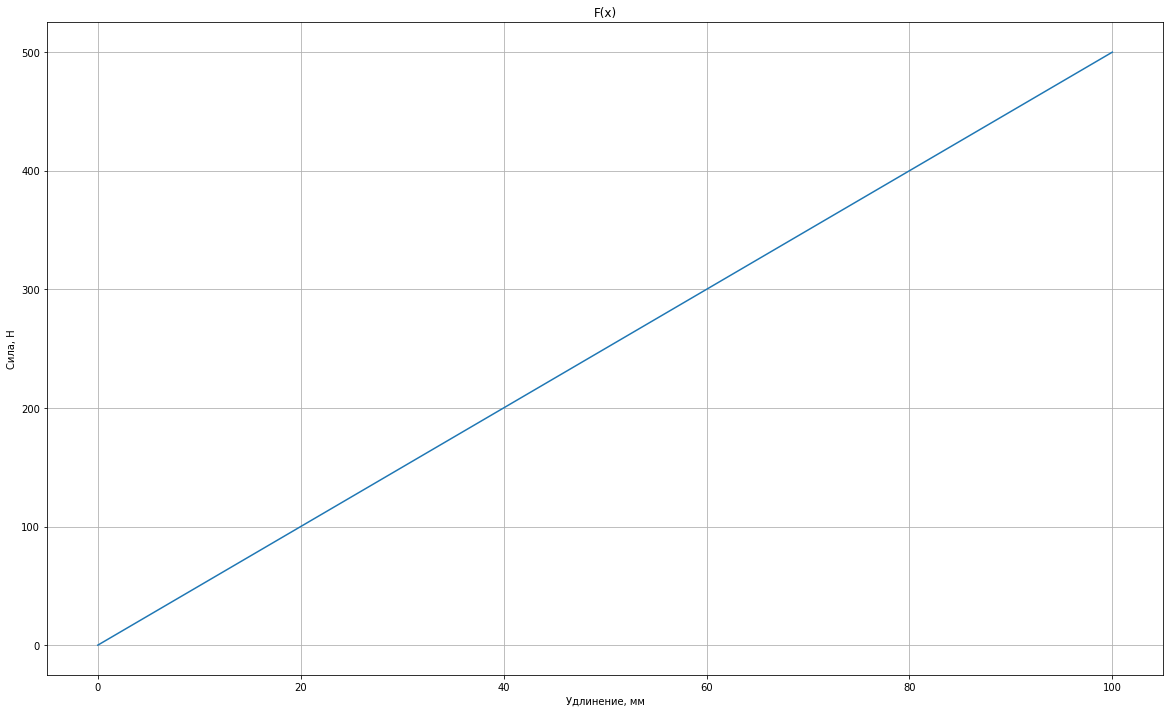

В реальности же все выйдет немного иначе. Здание, где вы проводите эксперимент, непременно будет находится недалеко от большого шоссе или подземной линии метро, может быть, поблизости будет аэропорт, или же просто на улице будет гроза. Внешнее влияние испортит, вибрации от всех этих раздражителей повлияют на чистоту эксперимента, и вы получите результат, немного отличный от ожидаемого. Пары точек $({F_i}, {𝛥x_i})$ не будут идеально лежать на прямой, вместо этого они будут как будто разбросаны вокруг нее.


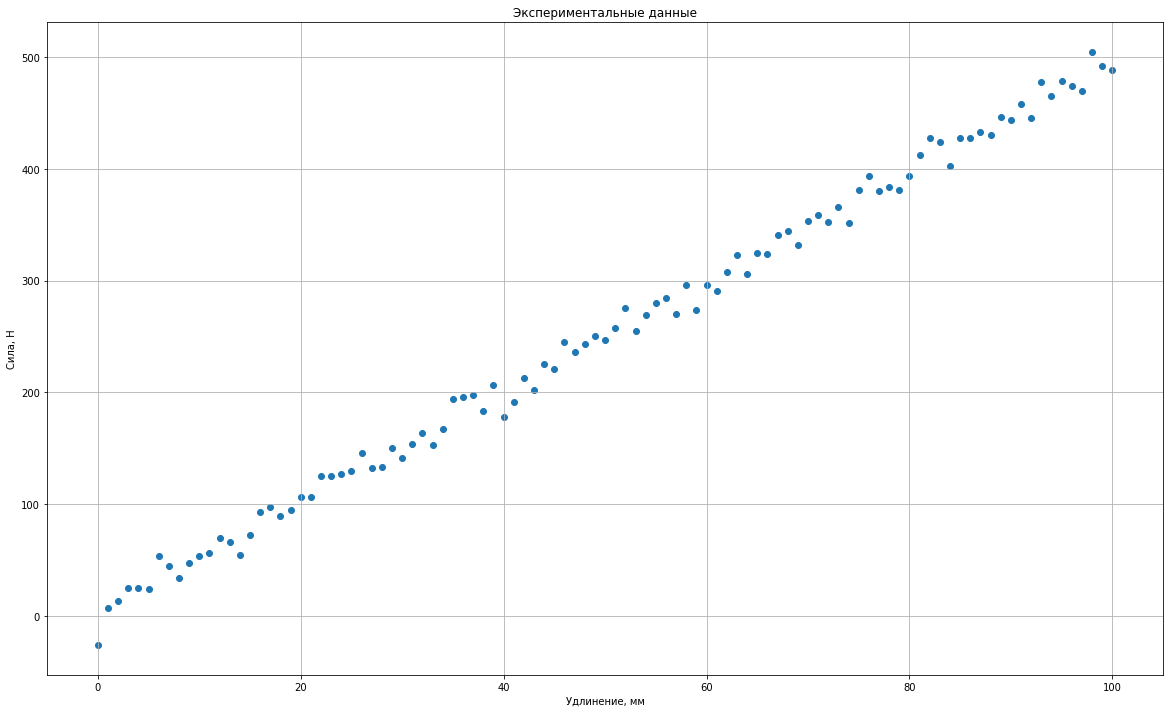

Как же вам понять, каков в действительности, хотя бы примерно, коэффициент упругости вашего материала? Ведь разные эксперименты дают совершенно разный результат.

Ответ состоит в том, что мы должны по последовательности наблюдений расшифровать скрытую в них линейную зависимость, построить аппроксимирующую прямую $$y = kx + b$$ (в случае закона Гука $b$=0), которая будет хорошо моделировать исходный закон природы.



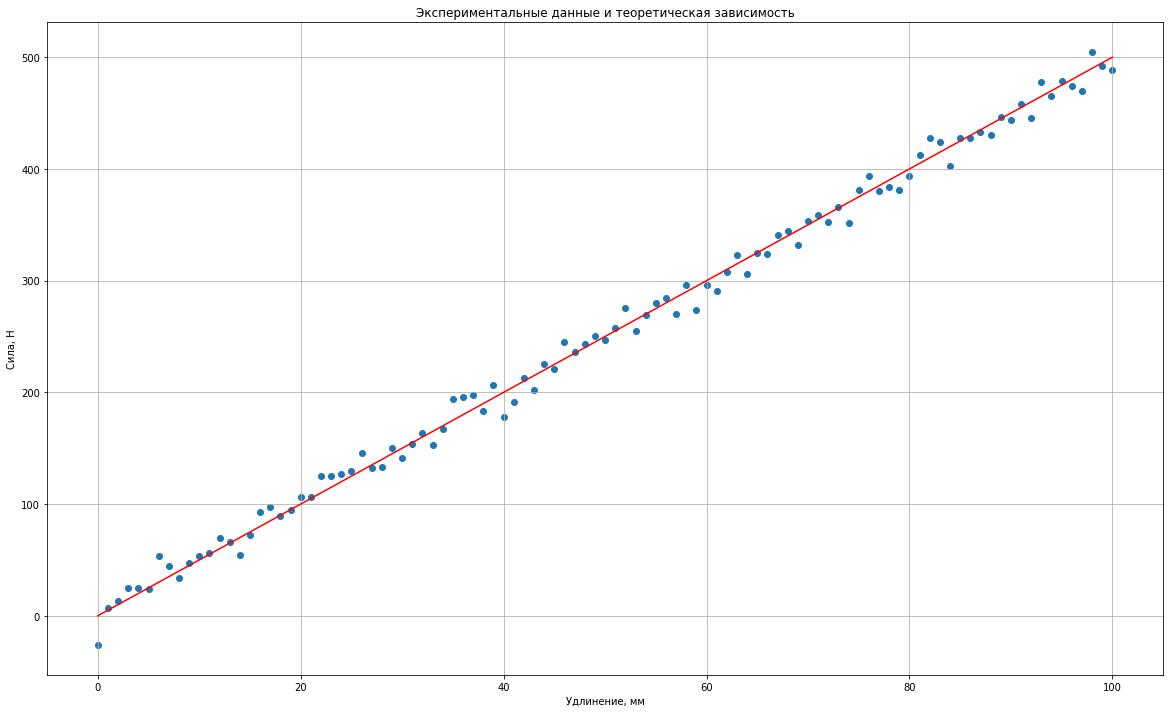

То есть задача вновь сводится к тому, что мы должны подобрать коэффициенты прямой $k$ и $b$ по нашей исходной размеченной выборке.

То есть наш алгоритм регрессии имеет вид $$a(x) = kx + b$$

# Что делать, когда признаков много (>1)?

Сейчас мы рассмотрим случай, когда требуется предсказать лишь одно свойство, но предсказание требуется сделать основываясь на $m-1$ разных признаках. То есть пространство, в котором мы работаем $m$-мерно ($m-1$ признак и $1$ свойство, которое мы хотим предсказать).

Например свойством объекта "яблоко" может быть его цена на ближайшем рынке, в то время как признаками, описывающими это яблоко, будут, скажем, его размер и зрелость. Если и от зрелости, и от размера по отдельности цена яблока будет зависеть линейно, то в этом пространстве будет существовать линейная гиперплоскость, каждая точка которой отвечает тройке (зрелость-размер-цена), и, зная размер и зрелость, мы можем однозначно предсказать цену.

В общем случае, предсказываемых свойств может быть больше.

Как мы обсуждали в прошлый раз, линейные поверхности могут быть представлены в многомерном пространстве как множество точек, удовлетворяющих [уравнению](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=12kOQH14arDC): $$f_w(x) = \sum\limits_{i=1}^{m-1}{x_i}{w_i} + {w_0} = (\vec{x}, \vec{w}) + {w_0} = 0$$

В этом случае, алгоритм линейной регрессии обобщается на многомерную плоскость следующем образом.

Пусть переменные $x_1 ... x_{m-1}$ обозначают признаковое описание объекта в $(m-1)$-мерном пространстве, а координата $m$ - прогнозируемую переменную. Тогда уравнение можно переписать следующим образом: $$x_{m} = -\frac{w_1}{w_n}{x_1} -\frac{w_2}{w_m}{x_2} - ... -\frac{w_{m-1}}{w_m}{x_{m-1}} - \frac{w_{0}}{w_m}$$

Ради удобства проведем следующее переименование: $$ \alpha_i := -\frac{w_{i}}{w_m}$$

Тогда значение искомой переменной $x_m$ можно выразить, как функцию от $x_1 ... x_{m-1}$ и вектора параметров $\vec{\alpha}$ $$x_m(x_1 ... x_{m-1}, \vec{\alpha}) = \alpha_1x_1 + ... + \alpha_{m-1}x_{m-1} + \alpha_0$$

И тогда при известном [векторе](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=pcSZI4RdFton) $\vec{\alpha}$ алгоритм линейной регрессии можно записать следующим образом:
$$a(\vec{x}) = {x_m(x_1 ... x_{m-1})}= \sum\limits_{i = 1}^{m-1}\alpha_ix_i + \alpha_0$$

За $a(x)$ здесь обозначено предсказание нашей модели, которое геометрически представляет собой значение $n$-й координаты точки гиперплоскости $x_m$.


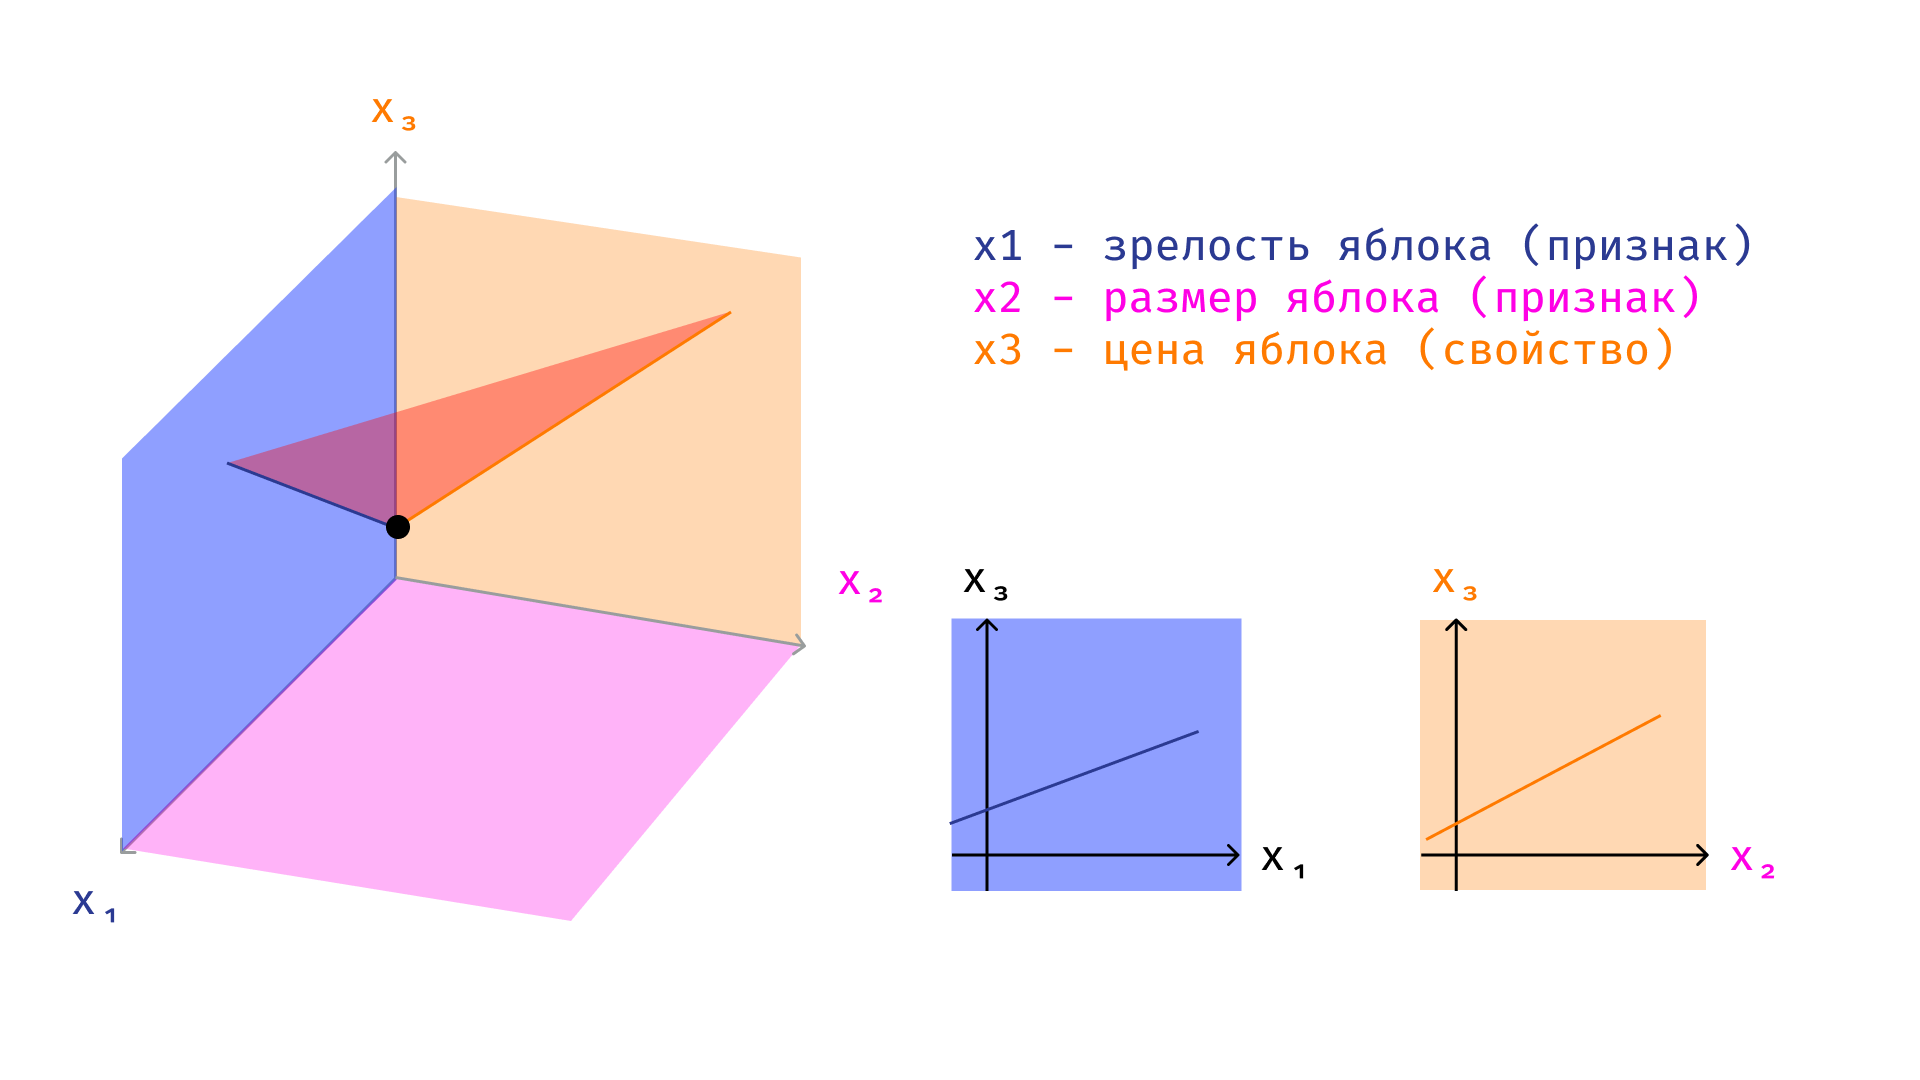

In [ ]:
import plotly
import plotly.graph_objects as go
import numpy as np
  
x = np.outer(np.linspace(0, 1, 30), np.ones(30))
y = x.copy().T
z = x+3*y + 1
z = z/2
layout = go.Layout( scene = {"xaxis":{"title":"Зрелость яблока"}, "yaxis":{"title":"Размер яблока"}, "zaxis":{"title":"Стоимость яблока"}})
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)], layout=layout)
fig.show()

# Матричная запись 

_______________________________________
Ради удобства записи выполним следующий маневр:
дополним вектор $\vec{x}$ еще одной координатой, которой присвоим значение $1$. 

В этом случае вектор $\vec{x}$ = ($x_1, ..., x_{m-1}, 1$)

А вектор $\vec{\alpha}$ заменим на вектор $(\alpha_1, ..., \alpha_{m-1}, \alpha_0)^T$

Тогда [скалярное произведение](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=OXZed9NEynaD) $(\vec{x},\vec{\alpha}) =  \sum\limits_{i=1}^{m-1}\alpha_ix_i + \alpha_0*1$, то есть наш алгоритм в таком случае примет вид $$a(\vec{x}) = (\vec{x},\vec{\alpha}) $$

В дальнейшем будем писать именно так.
_______________________________________
Пусть $X =\{x_{ij}\}$ - [матрица](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=heGITlnw8FKh), элемент которой $x_{ij}$ представляет собой $j$-й признак $i$-го объекта размерности $N \times M$. Такая матрица $X$ называется матрицей объектов-признаков.

$N$ в данном случае - количество объектов в выборке, а $M$ - число признаков, которыми описывается каждый из объектов.

Для того чтобы получить предсказание модели для $i$-го объекта, необходимо [умножить](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=lK00bznNIOP9) $i$-ю строчку этой матрицы на вектор параметров $\vec{α}$.

В этом случае матричное произведение $X\vec{\alpha}$ определяет вектор предсказаний модели: $$a(X) = X\vec{\alpha} \in R^N$$



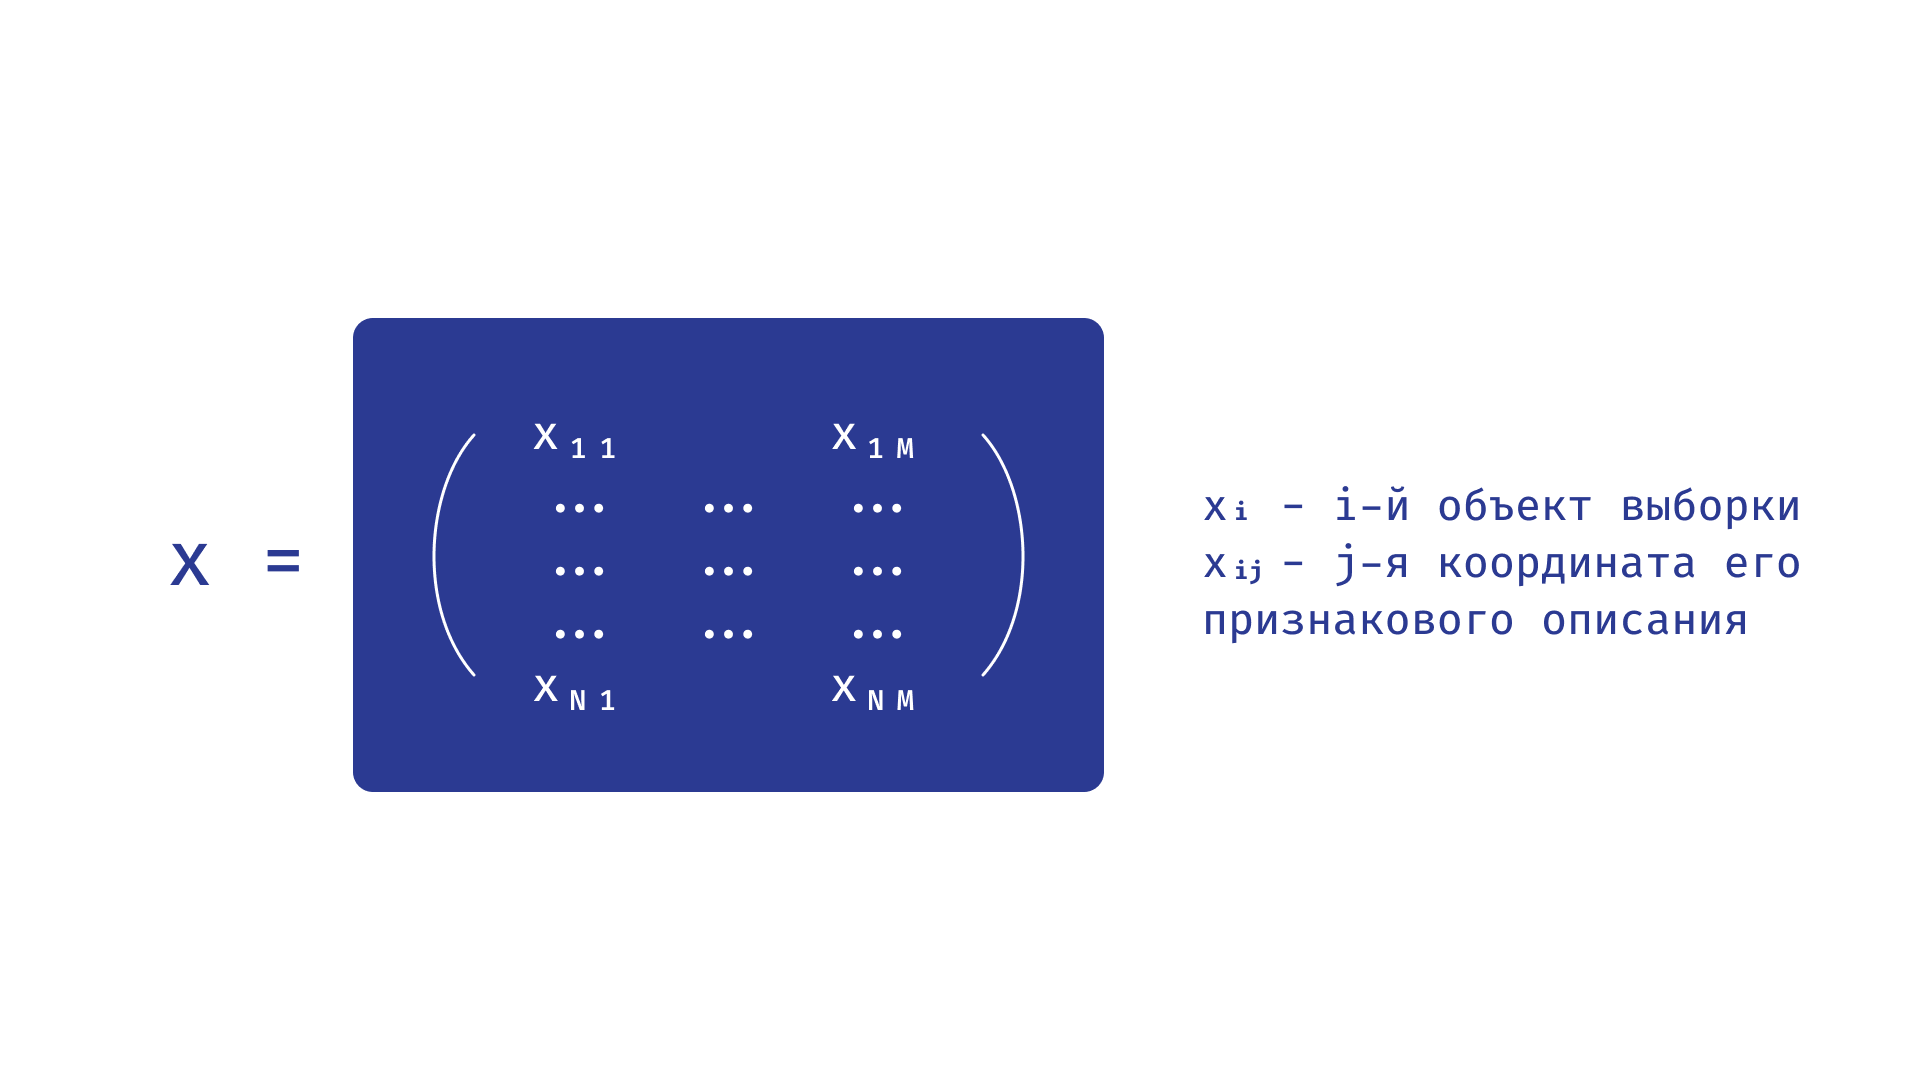

# Подбор параметров

Каким образом мы будем выбирать наилучшие параметры для предсказательной модели?

Как всегда для понимания стратегии поиска наилучших параметров, нам нужно понять, какие вообще параметры считаем наилучшими. Или, выражаясь в терминах машинного обучения, подобрать Loss-функцию, которую мы будем оптимизировать.

Обратимся к одномерному случаю. Пусть для объекта $x$ предсказание нашей модели $a(x)$, а настоящее значение переменной, которое мы должны были найти, - это $y$.

Ошибка алгоритма $a$ на объекте $x$ в этом случае может быть представлена в виде модуля или квадрата разности $|a(\vec{x}) - \vec{y}|$ или $(a(\vec{x}) - y)^2$. В этом случае функция **эмпирического риска** (то есть функция, наименьшее значения которой мы хотим найти, демонстрирующая совокупную ошибку алгоритма $a$ на всем датасете $X$) может быть записана в виде $$Q(a, X) = \frac{1}{N}∑(a(x_i) - y_i)^2$$ или $$Q(a, X) = \frac{1}{N}∑|a(x_i) - y_i|$$

Мы уже сталкивались с такой функцией, когда рассматривали решение задачи регрессии при помощи метрических классификаторов.

Простыми словами минимизация $Q(a,X)$ - это поиск такого вектора параметров алгоритма $\vec{\alpha_{опт}}$, при котором средняя ошибка нашего предсказания будет **минимальной**.

Здесь мы работаем с **квадратичной функцией**. Это значит, что ее минимум мы можем найти простыми школьными методами, продифференцировав $Q$ по $\vec{\alpha}$ и приравняв производную к 0

В одномерном случае:

$$a(x) = α_1x + {\alpha}_0$$

$$Q(a,x) = \frac{1}{N}((\alpha_1x_1 + \alpha_0 - y_1)^2 + ... + (\alpha_1x_N + \alpha_0 - y_N)^2)$$

Тогда, [продифференцировав](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=1m66zhVnUv9w) последнее выражение, получим:
$$\frac{∂Q(α_1, \alpha_2, x)}{∂α_1} = \frac{1}{N}(2x_1(\alpha_1x_1 + \alpha_0 - y_1) + ... + 2x_N(\alpha_1x_N + \alpha_0 - y_N)) (1)$$

$$\frac{∂Q(α_1, \alpha_2,x)}{∂α_0} = \frac{1}{N}(2(\alpha_1x_1 + \alpha_0 - y_1) + ... + 2(\alpha_1x_N + \alpha_0 - y_N)) (2)$$

Приравняв $(1)$ и $(2)$ к нулю и решив систему из двух линейных уравнений с двумя переменными, получаем точное аналитическое решение. 

$$\frac{\partial Q}{\partial α_1} = 2((α_1x_1 + α_0) - y_1)x_1 + ... + 2((α_1x_n + α_0) - y_N)x_N = 0$$

$$\frac{\partial Q}{\partial α_0} = 2(\alpha_1x_1 + \alpha_0 - y_1) + ... + 2(\alpha_1x_N + \alpha_0 - y_N) = 0$$

Тогда

$$α_1(x_1^2 + ... + x_N^2) = x_1y_1 + ... + x_Ny_N - α_0(x_1 + ... + x_N)$$

$$α_1(x_1 + ... + x_N) = y_1 + ... + y_N - Nα_0$$

Отсюда

$$\alpha_0 = \frac{y_1 + ... + y_N - \alpha_1(x_1 + ... + x_N)}{N}$$

$$\alpha_1 = \frac{x_1y_1 + ... + x_Ny_N - \frac{1}{N}(y1 + ... + y_N)(x1 + ... + x_N)}{x_1^2 + ... + x_N^2 - \frac{1}{N}(x_1 + ... + x_N)^2}$$


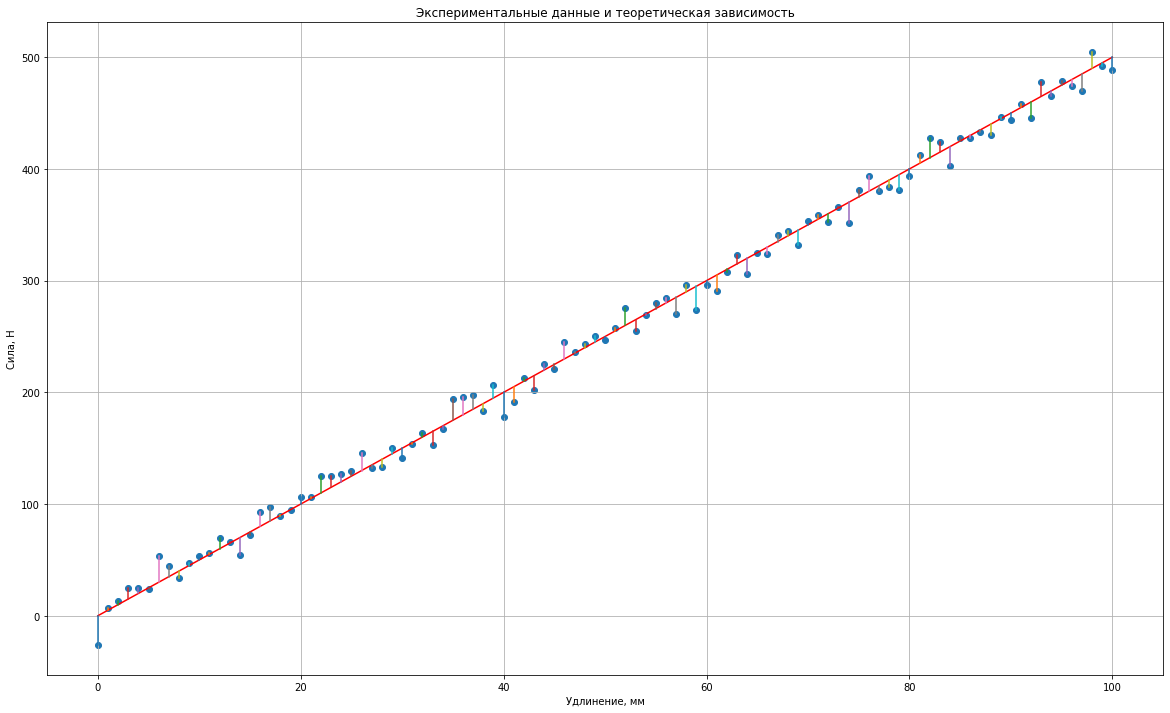

# Метод наименьших квадратов

Метод, описанный выше, называется методом наименьших квадратов (МНК). Причина такого названия очевидна. 

Но почему мы отдаем предпочтение минимизации квадратов, а не модулей?
Все дело в том, что принципиальной разницы, что из этого минимизировать, нет. Но у минимизации среднего квадрата отклонения есть несколько преимуществ: в отличие от суммы квадратов модулей, он везде дифференцируем, его производная удобно записывается. Средний квадрат ошибки в пространстве параметров задает поверхность [парабаллоида вращения](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=Ff1UdxhpPMaA), в то время как средний модуль - поверхность [конуса](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=7jfOrcDlNhb0). В вычислительной математике обычно отдают предпочтение именно квадратичной, а не модульной функции (хотя мы увидим, что бывают не столь редкие исключения).

## МНК можно распространить на случай признакового описания большей размерности.

В многомерном случае те же выражения можно записать в [матричном](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=heGITlnw8FKh) виде.
Предсказание модели с [вектором](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=pcSZI4RdFton) параметров $\vec{\alpha}$ для матрицы объектов-признаков $X$ получается простым [матричным перемножением](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=lK00bznNIOP9) $a(X) = X\vec{\alpha}$.

Если мы знаем вектор верных ответов $\vec{y} = (y_1 ... y_n)^T$, то совокупную ошибку по датасету можно выразить следующим образом: 

$$Q(\vec{α}, X, y) = \frac{1}{N}∑\limits_{i=1}^N((\vec{x}_i,\vec{α}) - y_i)^2$$

Или то же самое можно записать через **[норму](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=BQYo5PC3B_jZ)** (обобщение понятия длины) вектора отклонений предсказаний от верных ответов:

$$Q(\vec{α}, X, y) = \frac{1}{N}||X\vec{α} - \vec{y}||_2^2$$

В векторном случае:
$$||\vec{a}||_2 = \sqrt{a_1^2 + ... + a_n^2}$$

Эту функцию мы собираемся минимизировать по вектору параметров $\vec{α}$.

## Замечание*
______________________________
В самом общем случае мы можем делать предсказания нескольких свойств. Тогда нам нужно сделать следующие преобразования.

Теперь $y_i$  может быть вектором любой размерности $K$. Это вектор всех тех свойств, которые мы **хотим предсказать**. $K$ - это количество таких свойств.
Количество таких векторов - это количество объектов в нашей выборке. Совокупность векторов $y_i$ задаст нам [матрицу](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=heGITlnw8FKh) верных ответов $Y$ размерности $N × K$.

Соответственно $x_i$ - это вектор, содержащий признаковое описание объекта, его размерность вообще говоря не совпадает с размерностью $y_i$

Вектор $\vec{α}$ превратится в матрицу параметров $A$ размерности $M × K$.

Функция ошибки останется практически неизменной в такой записи:
$$Q(A, X, y) = \frac{1}{N}\frac{1}{K}∑\limits_{i=1}^K∑\limits_{j=1}^N((\vec{x}_j, A_i^T) - Y_{ji})^2$$
______________________________


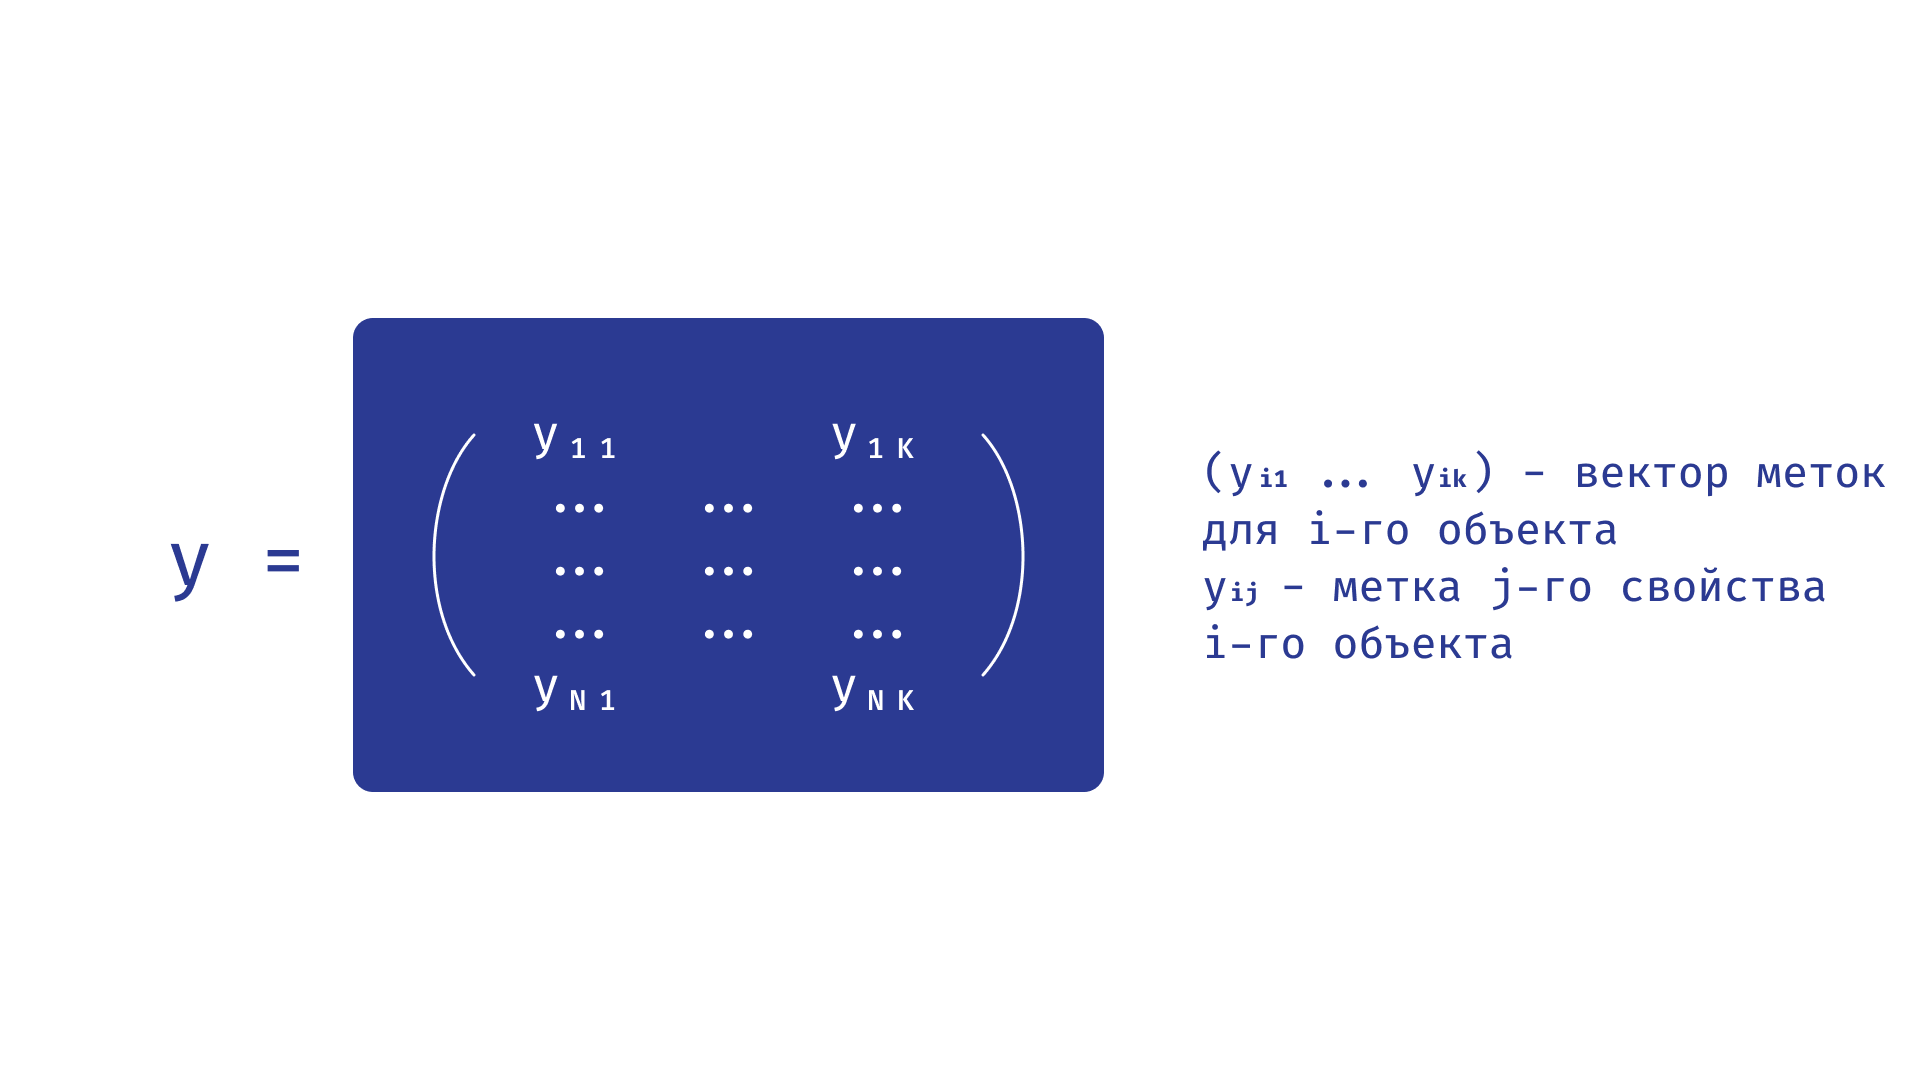

# Решение многомерного МНК

Для нахождения экстремума необходимо [продифференцировать](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=1m66zhVnUv9w) $Q$ по $α$ и приравнять производную к 0. Найденный экстремум обязательно будет минимумом функции, так как функция квадратичная, выпуклая вниз.

Правила линейной алгебры учат нас, что $\frac{∂Q(\vec{α}, \vec{x})}{∂\vec{α}} = 2X^T(X\vec{α} - \vec{y}) = 0$

Решение этого матричного уравнения находится при помощи последовательности несложных [преобразований](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=BTk1TQ82_qbg):

$$X^TX\vec{α} = X^T\vec{y}$$
$$\vec{α}_{опт} = (X^TX)^{-1}X^T\vec{y}$$

Итак, мы нашли аналитическое решение, выразив вектор оптимальных параметров $\vec{α}_{опт}$

Тут возникает проблема численной реализации такого алгоритма поиска параметров: мы видим, что в формуле присутствует обращение ([транспонирование](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=8EIzs6mFVbt6) и [перемножение двух матриц](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=RJE2i2Z8V5mN)) матрицы $X^TX$. Эта операция вычислительно сложная, и накладывает определенные требования на матрицу $X$, которым она, вообще говоря, может и не удовлетворять. Часто вместо такого метода поиска точного минимума функции $Q$ на практике используют метод градиентного спуска.

# Пример

Рассмотрим следующий пример.
В соревновании Predicting Future Sales на Kaggle (https://www.kaggle.com/c/competitive-data-science-predict-future-sales) участникам дана информация о продажах товаров на различных торговых точках по всей России за трехлетний период. Участникам соревнования нужно предсказать продажи товаров на ближайший месяц по историческому опыту, но мы посмотрим на этот интересный датасет с другой стороны.

Мы посчитаем ежемесячный доход одного конкретного магазина и постараемся предсказать его, построив линейную модель регрессии.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

#Here you need to take your own api key from kaggle
api_token = {"username":"sergeyartamonov","key": "INSERT YOUR OWN HERE"}

import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c competitive-data-science-predict-future-sales

competitive-data-science-predict-future-sales.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import pandas as pd
import zipfile

with zipfile.ZipFile('./competitive-data-science-predict-future-sales.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
sales = pd.read_csv('./sales_train.csv')
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


Выберем только один магазин с индексм 59. Почему 59? А почему бы и нет?

In [ ]:
# Выбираем нужный магазин
sales59 = sales[sales.shop_id == 59]

# Переводим дату в нужный формат
sales59.date = pd.to_datetime(sales59.date)

# Установим дату в качестве индекса
sales59['date_for_idx'] = sales59.date
sales59.set_index('date_for_idx', inplace=True)

In [ ]:
sales59

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
date_for_idx,,,,,,
2013-02-01,2013-02-01,0,59,22154,999.0,1.0
2013-10-01,2013-10-01,0,59,22151,399.0,1.0
2013-04-01,2013-04-01,0,59,5603,699.0,1.0
2013-01-19,2013-01-19,0,59,5587,199.0,2.0
2013-01-31,2013-01-31,0,59,5613,5571.0,1.0
...,...,...,...,...,...,...
2015-10-10,2015-10-10,33,59,4962,298.0,1.0
2015-04-10,2015-04-10,33,59,4706,299.0,1.0
2015-11-10,2015-11-10,33,59,5002,2999.0,1.0


Выкинем лишние столбцы и посчитаем доход от продажи каждого товара

In [ ]:
# Выкидываем лишние столбцы
sales59 = sales59.drop(columns=['date_block_num', 'item_id', 'shop_id'])

# Считаем доход
sales59['income'] = sales59['item_price']*sales59['item_cnt_day']

Попробуем по доходу в первые 9 месяцев 2013 года оценить доход магазина за октябрь (декабрь - время праздников и подарков, он сильно выбивается, и качество предсказаний будет заметно хуже. Ноябрь, как ни странно, тоже ощущает на себе этот эффект, так что его тоже не возьмем в рассмотрение)

In [ ]:
# Рассмотрим только 2013 год
sales_59 = sales59[sales59.index.year == 2013]

#Берем все до октября включительно
sales_59 = sales_59[sales_59.index.month < 11]

#В качестве исторически накопленных знаний берем все до сентября включительно
sales_59_historic = sales_59[sales_59.index.month < 10]

#В качестве месяца для предсказания берем октябрь
sales_59_to_predict = sales_59[sales_59.index.month == 10]

#Отсортируем обучающую выборку по дате
sales_59_historic = sales_59_historic.sort_values(by = 'date')

#И тестовый месяц тоже
sales_59_to_predict = sales_59_to_predict.sort_values(by = 'date')

# Посчитаем накопленный доход
sales_59_historic['INC'] = sales_59_historic.income.cumsum()

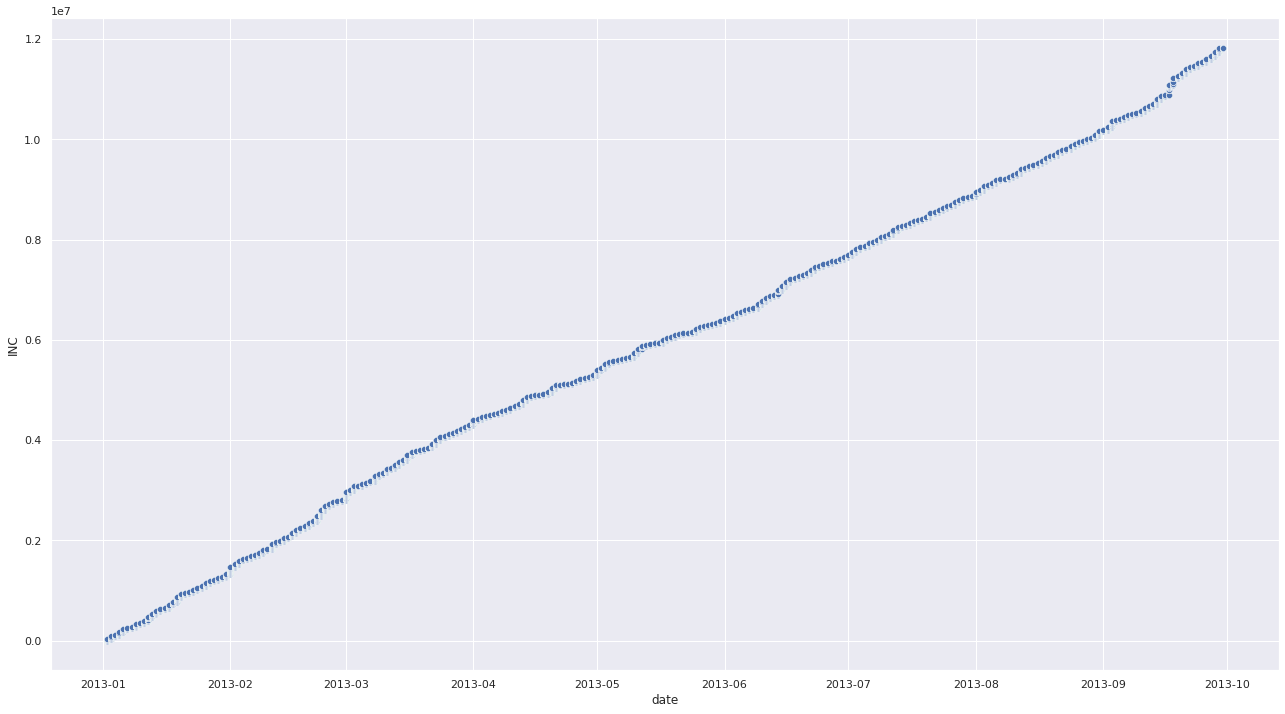

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

plt.figure(figsize = (22,12))
sns.scatterplot(data=sales_59_historic,x='date', y='INC')

Кажется, что накопленный доход и правда неплохо можно смоделировать линейной зависимостью.

В следующей ячейке встречается такой код:

```
target = sales_59_historic.INC.resample('1D').agg('last')
```

Думаю, к нему требуются некоторые пояснения.
Вообще метод `.resample()` объекта класса `pandas.DataFrame` применяется для проведения агрегирования данных по некоторым промежуткам времени. Для этого необходимо, чтобы индекс такого `DataFrame` был объектом типа `datetime`.

В аргумент функции `.resample()` передается период, по которому будет проводиться агрегирование. Этот период можно обозначить строкой вида "NT", где N - некоторое число, обозначающее количество времени в некоторых единицах, а T - эти единицы. Например, "1D" означает N = 1, T = Day (1 день)

В нашем случае на входе мы имеем список покупок с указанием времени их совершения, а также накопленный с каждой сделкой доход, который хранится в поле `INC`. Нам же хочется получить массив, в котром показано, какой совокупный доход был у магазина к концу каждого дня. Это значит, что нам необходимо обратиться к полю `INC` и взять **последнее значение** `INC` для **каждого дня**. В момент исполнения команды `.resample('1D')` мы получаем специальную структуру, обобщающую информацию по дням, а затем мы применяем `.agg('last')`, позволяющую агрегировать эти ежедневные данные, выбрав только последнее значение из них.

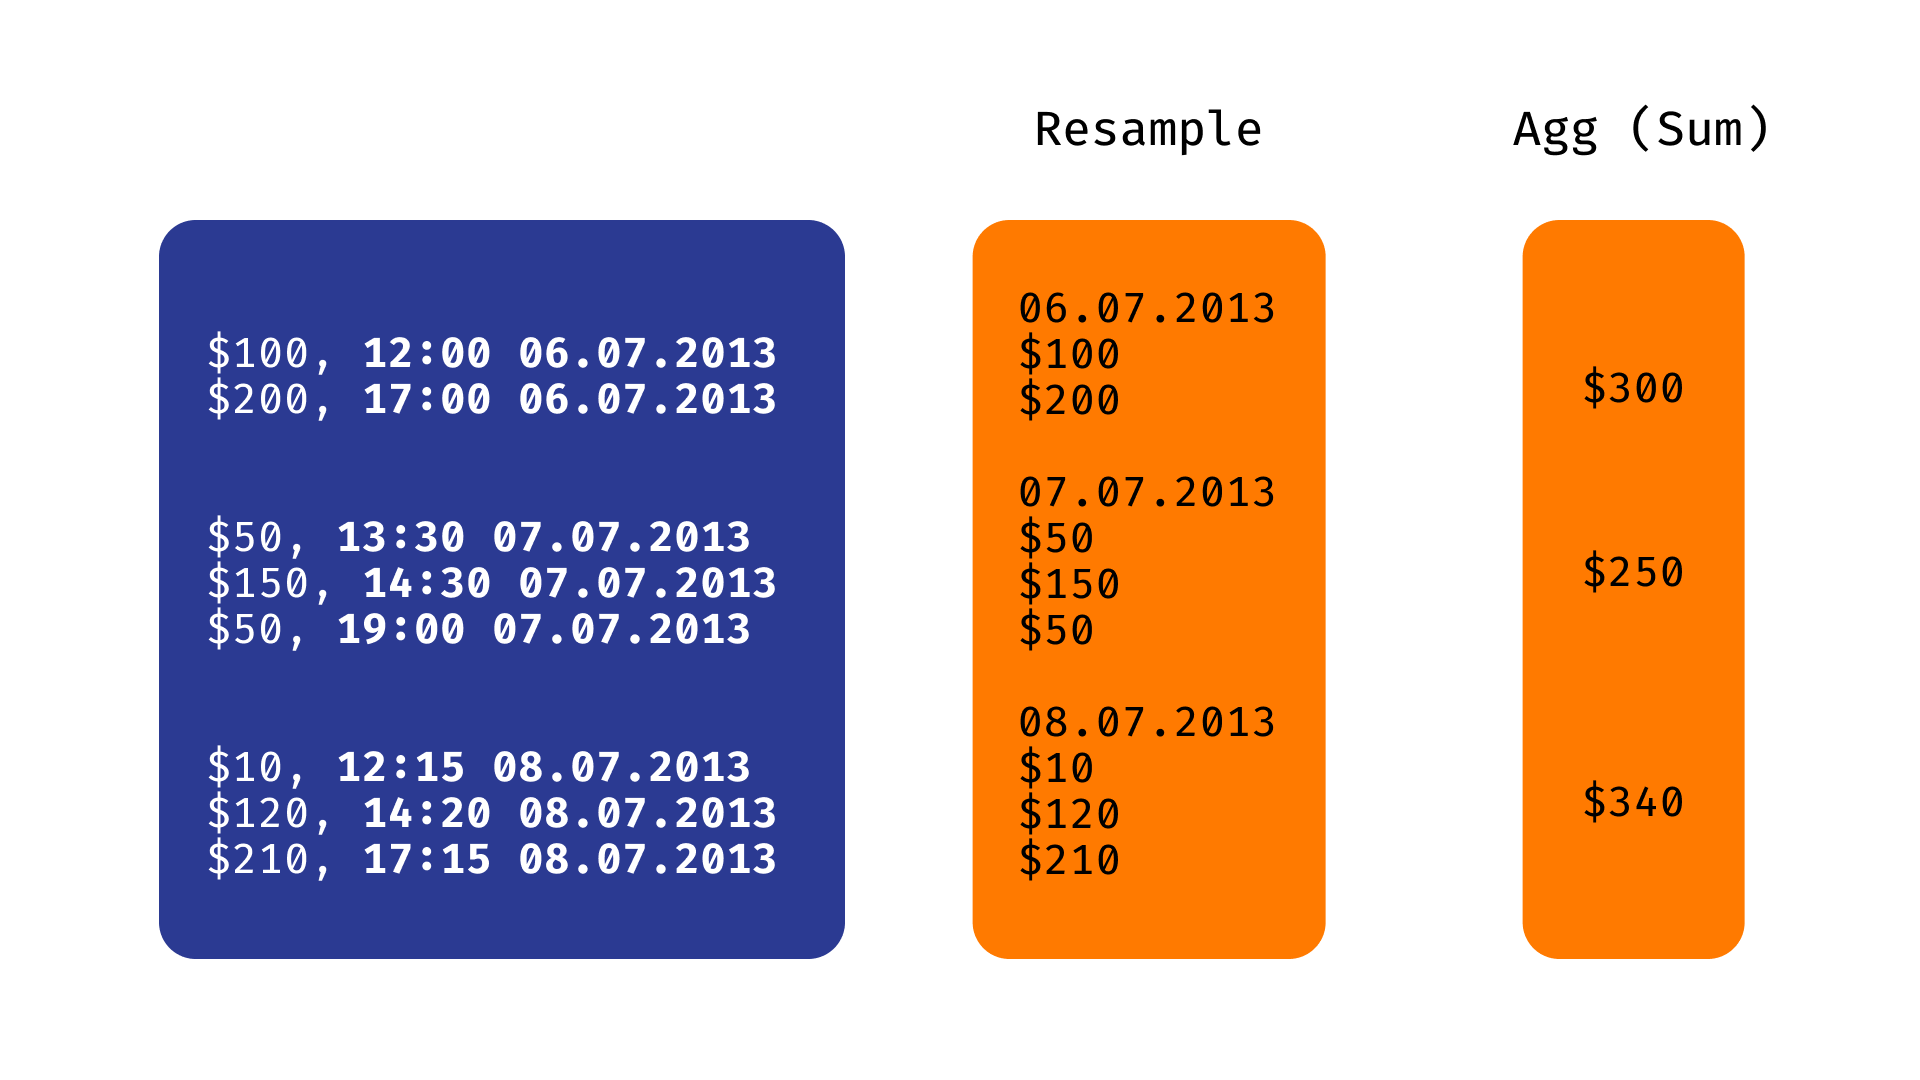

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Зададим список дней, в нашем случае именно они станут x координатой 
days =  np.arange(272).reshape(-1, 1)

# Зададим ежедневный доход при помощи pandas.resample
target = sales_59_historic.INC.resample('1D').agg('last').values.reshape(-1, 1)

#Обучим LinearRegression
LR = LinearRegression().fit(days,target)

Взглянем на построенную прямую:

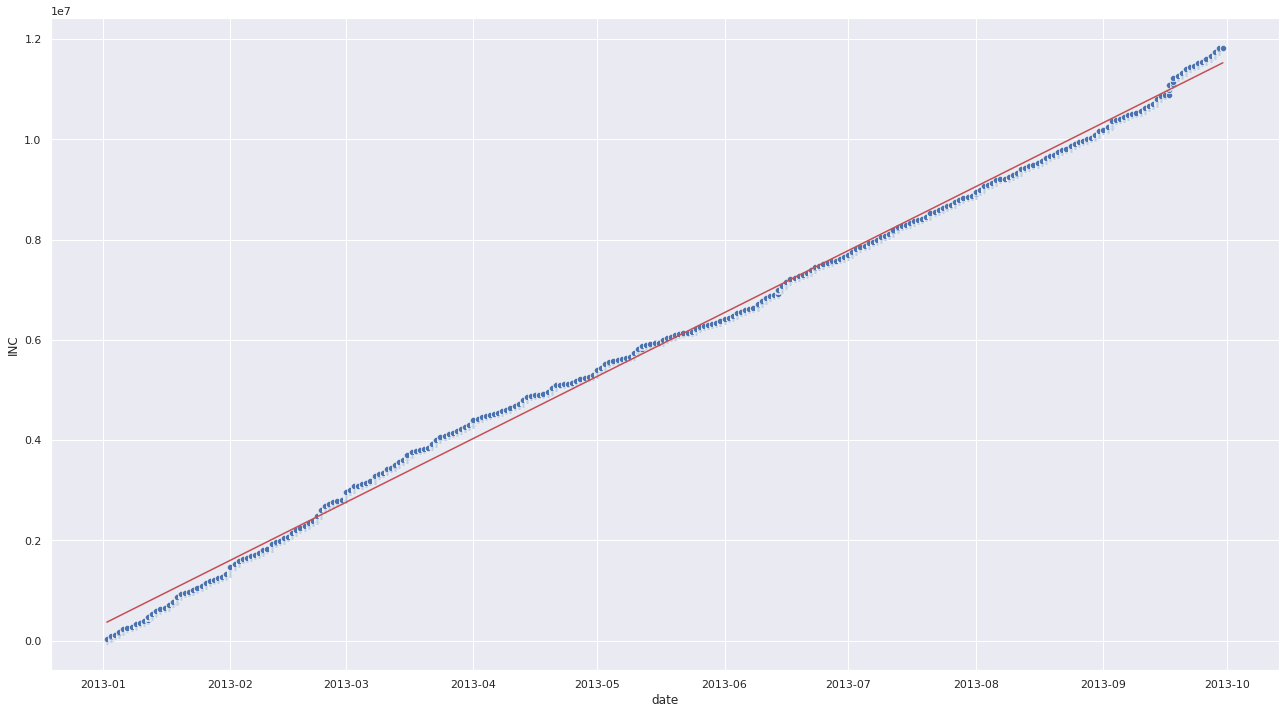

In [ ]:
#Список тренировочных дней в формате datetime и предсказание
days_as_datetime = sales_59_historic['date'].resample('1D').agg('last')
predictions = LR.predict(days).reshape(-1)

#Зададим dataframe для использования с seaborn
predicted = pd.DataFrame({'date': days_as_datetime, 'prediction': predictions}) 

# Нарисуем нашу прямую
plt.figure(figsize = (22,12))

sns.scatterplot(data=sales_59_historic,x='date', y='INC')
sns.lineplot(data=predicted, x='date', y='prediction',  c='r')

In [ ]:
# Проверим, насколько предсказание нашей модели о доходе в октябре соотносится с реальностью
# Зададим интересующий нас день, то есть на месяц позже последнего значения в обучающей выборке
day = 272 + 31

#Сделаем предсказание на 303 день и вычтем значение накопленного дохода в начале месяца
prediction = LR.predict([[day]]) - sales_59_historic.INC[-1]

# Посчитаем доход в октябре, как сумму всех сделок
real_income = sales_59_to_predict.income.sum()

# Найдем ошибку предсказания и относительную ошибку
deviation = real_income - prediction
error_rate = deviation/real_income
print(f'Предсказание модели: {prediction} в то время как настоящее значение: {real_income}. Относительная ошибка предсказания: {error_rate}')

Предсказание модели: [[1015308.78636698]] в то время как настоящее значение: 1352985.0. Относительная ошибка предсказания: [[0.24957868]]


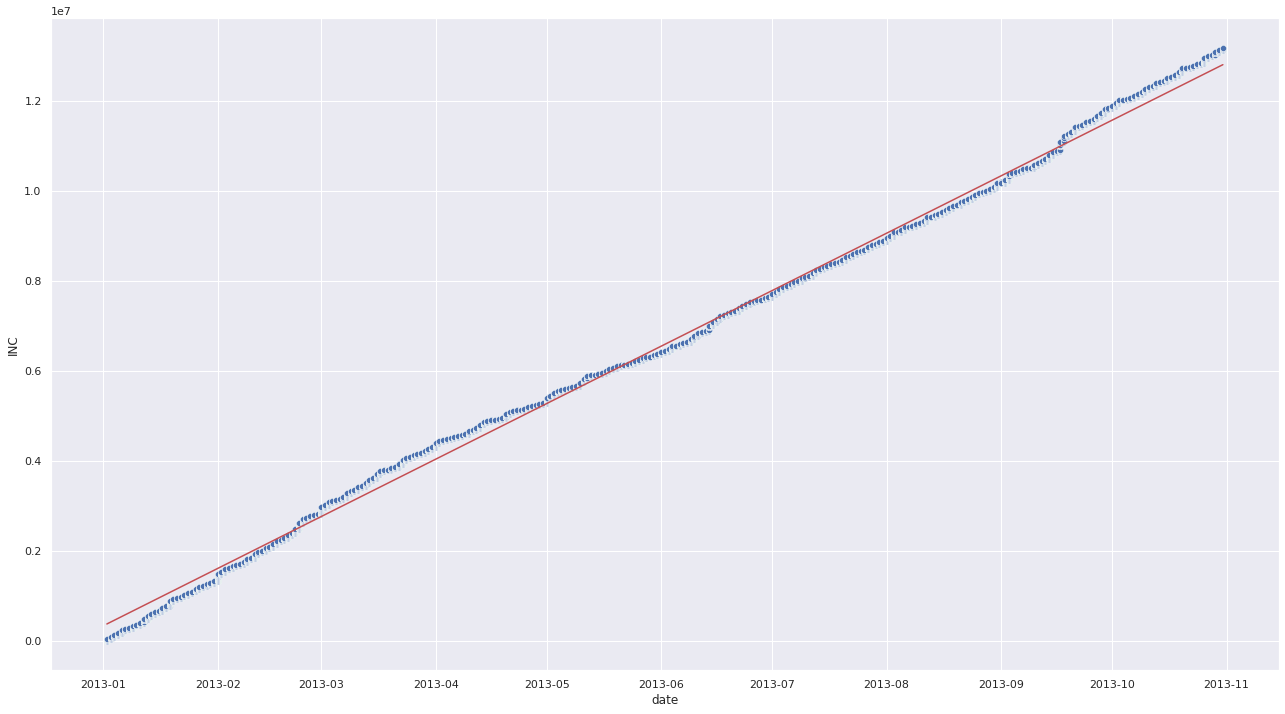

In [ ]:
# Нарисуем с учетом октября
sales_59 = sales_59.sort_values(by = 'date')
sales_59['INC'] = sales_59.income.cumsum()

days_as_datetime = sales_59['date'].resample('1D').agg('last')
predicted = pd.DataFrame({'date': days_as_datetime, 'prediction': LR.predict(np.arange(303).reshape(-1,1)).reshape(-1)})

plt.figure(figsize=(22,12))
sns.scatterplot(data=sales_59,x='date', y='INC')
sns.lineplot(data=predicted, x='date', y='prediction',  c='r')

Предсказание модели получилось довольно неплохое. Однако, допущенная ошибка, вероятнее всего, связана с тем, что в середине сентября случилась смена режима дохода. Это может быть связано с объективными историческими событиями: изменениями правил или законодательств, банкротством поставщиков, или же, наоборот, - с открытием новых производственных мощностей, или же с сотней других причин. Тем не менее мы видим, что закономерность довольно неплохо описывается линейной регрессией, имеющей предсказательную силу.

# Обобщение SVM на задачу регрессии

Обобщается на задачу регрессии и модель метода опорных векторов. Если в случае задачи классификации требовалось максимизировать ширину полосы, отделяющей один класс от другого, то в случае задачи регрессии требуется минимизировать ширину полосы, содержащей наблюдаемые значения.


Также как и в задаче классификации, можно выписать аналитическое решение задачи минимизации, и получить набор параметров, задающих теперь уже гиперплоскость для прогнозирования новых значений переменной $y$.


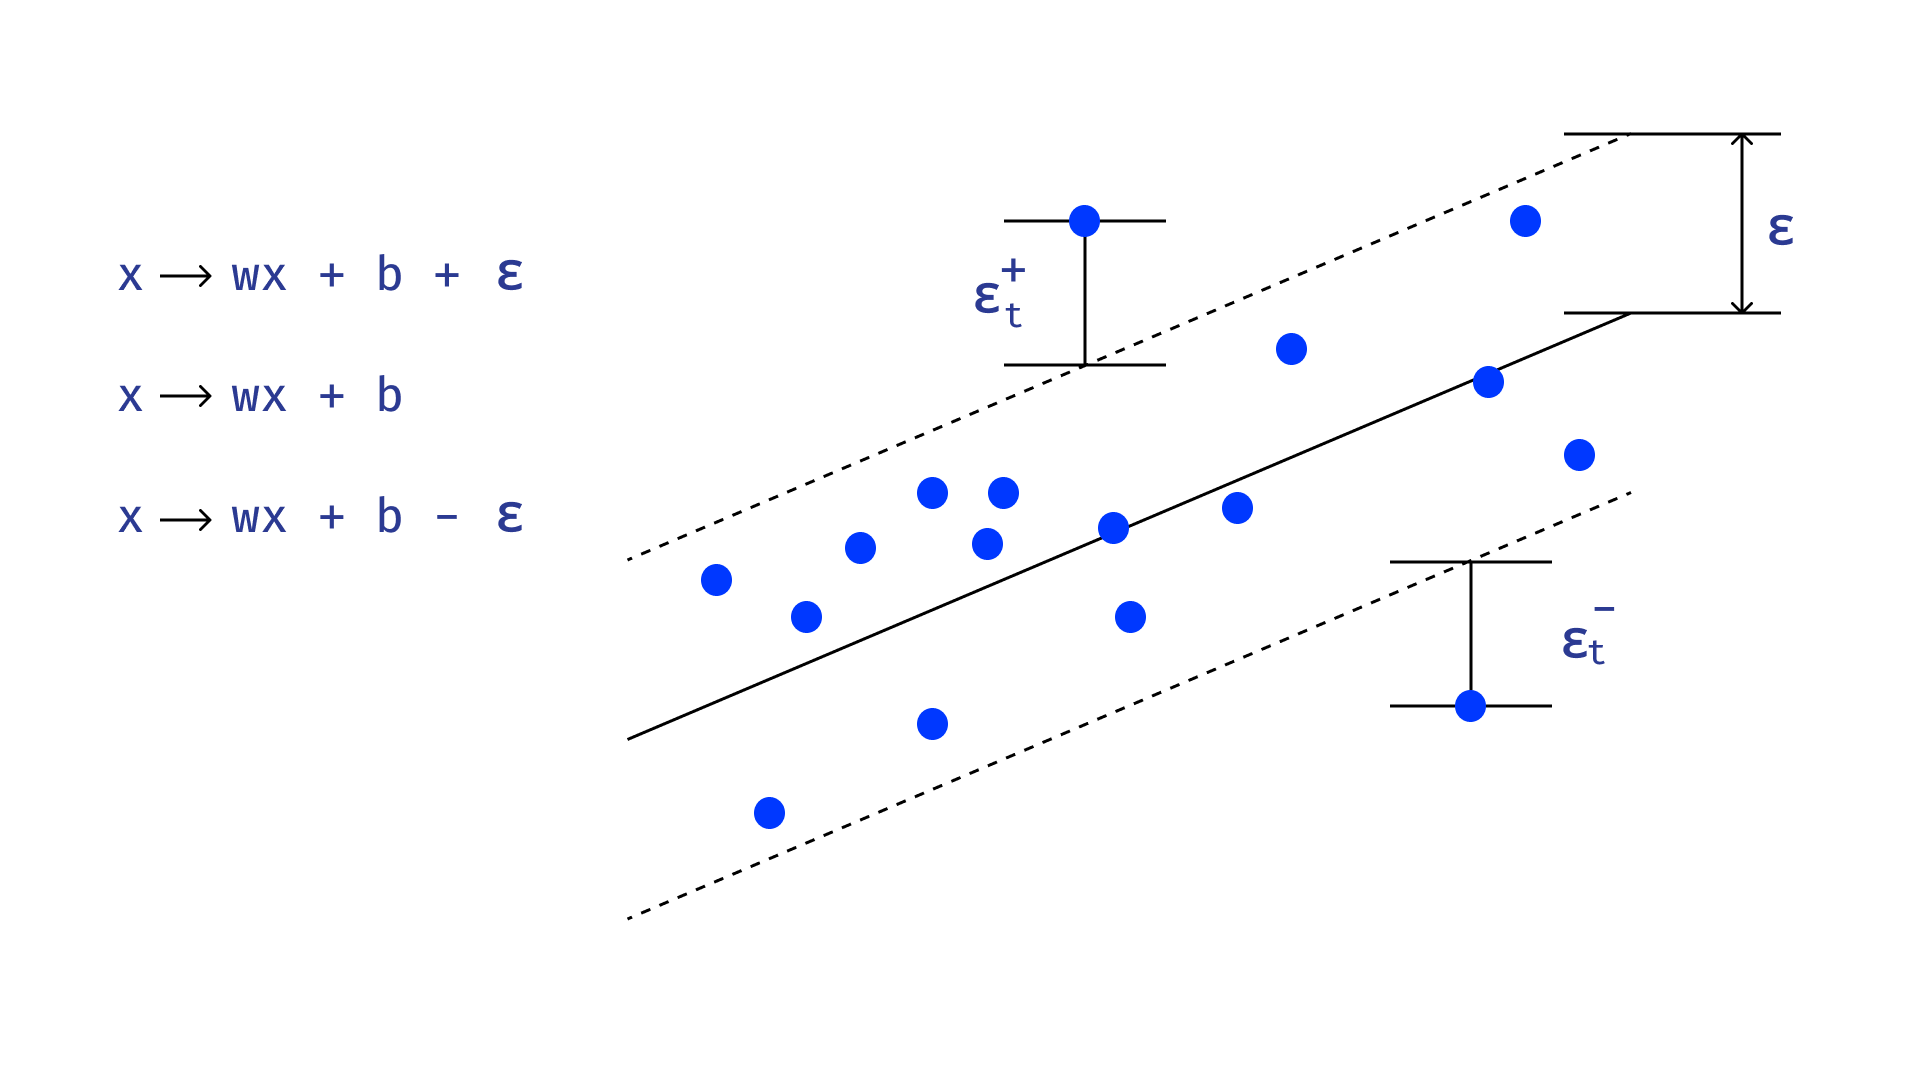

# Метрики качества регрессии

Не вполне очевидным вопросом является оценка качества линейной (да и вообще любой) регрессии. Разебермся с некоторыми популярными метриками качества.

## 1. Mean Absolute Error

Метрика $MAE$ представляет из себя оценку ожидаемого модуля отклонения предсказания модели от действительного значения. На выборке $X$ эту метрику можно посчитать по формуле

$$
MAE = \frac{1}{N}∑\limits_{x \in X}|a(x) - y_x|
$$

Значение этой метрики неотрицательно, и достигает нуля только в случае идеального предсказания модели на выборке $X$. Таким образом, $MAE$ - это метрика, которую требуется **минимизировать**.

## 2. Mean Squared Error
Метрика $MSE$ представляет из себя оценку ожидаемого квадрата отклонения предсказания модели от действительного значения. В отличие от $MAE$, по $MSE$ удобно проводить оптимизацию при помощи градиентных методов. Из недостатков $MSE$ можно выделить тот факт, что значение $MSE$ может сбить с толку при невнимательном анализе, ведь ошибка предсказания здесь возводится в квадрат. То есть абсолютной ошибке =2, например, будет соответствовать среднеквадратичная ошибка =4.


$$
MSE = \frac{1}{N}∑\limits_{x \in X}(a(x) - y_x)^2
$$

Значение $MSE$ также неотрицательно и достигает нуля только в случае идеального предсказания модели на выборке $X$, а значит $MSE$ также необходимо **минимизировать**.

## 3. Root Mean Squared Error

Простая модификация $MSE$, предназначенная для восстановления масштаба ошибки, утерянного при возведении в квадрат абсолютной ошибки в $MSE$:
$$
RMSE = \sqrt{\frac{1}{N}∑\limits_{x \in X}(a(x) - y_x)^2}
$$

In [ ]:
def mae(y_true, y_pred):
  err = np.abs(y_true - y_pred)
  mean_abs_err = np.mean(err)
  return mean_abs_err
  
def mse(y_true, y_pred):
  s_err = (y_true - y_pred)**2
  mean_s_err = np.mean(s_err)
  return mean_s_err

def rmse(y_true, y_pred):
  mean_s_err = mse(y_true, y_pred)
  root_mse = np.sqrt(mean_s_err)
  return root_mse

Попробуем применить эти метрики для оценки ошибки линейной регрессии.

## Пример

Рассмотрим следующую задачу. Пусть мы хотим предсказать размер вклада человека в некотором банке по описанию его дохода. Клиенты этого банка делятся на несколько категорий: пенсионеры, семьи с детьми, подростки, бизнесмены и молодые специалисты по машинному обучению.

Зададим такой датасет синтетически.

In [ ]:
"""
  Генерирование синтетического датасета
"""
import numpy as np
# Функция, задающая линейную зависимость между двумя переменными с некоторым шумом
def lin_norm_noise(X, k, mu_x, mu_y, sigma_x, sigma_y):
    noise = lambda x: k*(x*sigma_x + mu_x) + np.random.randn()*sigma_y + mu_y
    Y = np.zeros((X.shape[0],2))
    for i,x in enumerate(X):
        Y[i][0] = x*sigma_x + mu_x
        Y[i][1] = noise(x)
    return Y

retiree = lin_norm_noise(X=np.random.randn(150), k=2, mu_x=30_000, mu_y=2_000_000, sigma_x=2_000, sigma_y=20_000)

teenagers = abs(lin_norm_noise(X=np.random.randn(75), k=1.5, mu_x=8_000, mu_y=20_000, sigma_x=2_000, sigma_y=5_000))

families = lin_norm_noise(X=np.random.randn(25), k=0.5, mu_x=80_000, mu_y=250_000, sigma_x=3_000, sigma_y=10_000)

young_machine_learners = lin_norm_noise(X=np.random.randn(500), k=3, mu_x=150_000, mu_y=750_000, sigma_x=2_000, sigma_y=10_000)

businessmen = lin_norm_noise(X=np.random.randn(100), k=1, mu_x=250_000, mu_y=2_000_000, sigma_x=10_000, sigma_y=20_000)

# Create dataset
# Другие признаки: стаж работы, возраст

age_retiree = 70 + np.random.randn(150)*5
age_teenagers = 16 + np.random.randn(75)*2
age_families = 33 + np.random.randn(25)*5
age_young_machine_learners = 25 + np.random.randn(500)*2
age_businessmen = 50 + np.random.randn(100)*3

experience_retiree = 40 + np.random.randn(150)*5
experience_teenagers = 1 + np.random.randn(75)*0.1
experience_families = 10 + np.random.randn(25)*2
experience_young_machine_learners = 3 + np.random.randn(500)*1
experience_businessmen =20 + np.random.randn(100)*3

# Формируем датасет
x_retiree = np.concatenate([retiree, age_retiree.reshape(-1,1), experience_retiree.reshape(-1,1)], axis=-1)
x_teenagers = np.concatenate([teenagers, age_teenagers.reshape(-1,1), experience_teenagers.reshape(-1,1)], axis=-1)
x_families = np.concatenate([families, age_families.reshape(-1,1), experience_families.reshape(-1,1)], axis=-1)
x_young_machine_learners = np.concatenate([young_machine_learners, age_young_machine_learners.reshape(-1,1), experience_young_machine_learners.reshape(-1,1)], axis=-1)
x_businessmen = np.concatenate([businessmen, age_businessmen.reshape(-1,1), experience_businessmen.reshape(-1,1)], axis=-1)

X = np.concatenate([x_retiree, x_teenagers, x_families, x_young_machine_learners, x_businessmen], axis=0)
y = X[:,1]
X = np.delete(X, 1, 1)

Датасет готов! Он включает в себя 3 признака: стаж работы, возраст и ежемесячный доход клиента. Ради простоты возьмем в качестве фактора лишь ежемесячный доход и попробуем построить линейную регрессию для решения задачи.

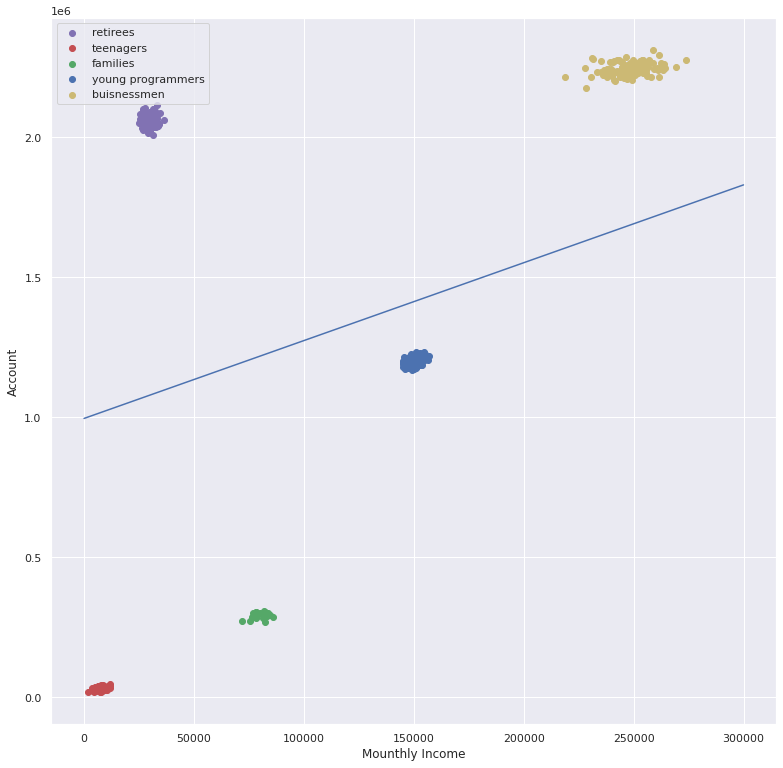

In [ ]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

LR = LinearRegression().fit(X[:,0].reshape(-1,1), y)

plt.figure(figsize=(13,13))
plt.scatter(retiree[:,0], retiree[:,1], c='m', label='retirees')
plt.scatter(teenagers[:,0], teenagers[:,1], c='r', label='teenagers')
plt.scatter(families[:,0], families[:,1], c='g', label='families')
plt.scatter(young_machine_learners[:,0], young_machine_learners[:,1], c='b', label='young programmers')
plt.scatter(businessmen[:,0], businessmen[:,1], c='y', label='buisnessmen')

plt.legend()
plt.xlabel('Mounthly Income')
plt.ylabel('Account')
plt.plot([0, 300_000], [LR.predict([[0.]]), LR.predict([[300_000]])])

Посчитаем метрики:

In [ ]:
# Предсказания модели
preds = LR.predict(X[:,0].reshape(-1,1))

# MSE
mse_score = mse(y, preds)

# RMSE
rmse_score = rmse(y, preds)

# MAE
mae_score = mae(y, preds)

In [ ]:
mse_score

343905151033.6173

In [ ]:
rmse_score

586434.2682974942

In [ ]:
mae_score

477754.4528536529

Можно ли сказать что-то определенное по этим метрикам?

Кажется, что это довольно сложно. Если `rmse` и `mae` хотя бы по порядку значения совпадают с нашей целевой переменной, то `mse` совсем далека даже от этого. Эти метрики достаточно плохо интерпретируются. Как следствие, в чистом виде их обычно используют для **сравнения** моделей, а не абсолютной оценке качества (хотя и это допускается в определённых ситуациях).

Далее мы рассмотрим метрику, которая с одной стороны является более удобной для интерпретации, а с другой представляет из себя модификацию `mse`.

А пока поговорим об очевидных сложностях, с которыми мы столкнулись прямо сейчас.

В глаза сразу бросается сложность, с которой столкнулась наша регрессионная модель:

Данные, с которыми мы работаем, неоднородны, они выбраны из нескольких принципиально разных распределений и перемешаны. В этом можно дополнительно убедиться, нарисовав гистограмму распределения признака Mounthly Income.

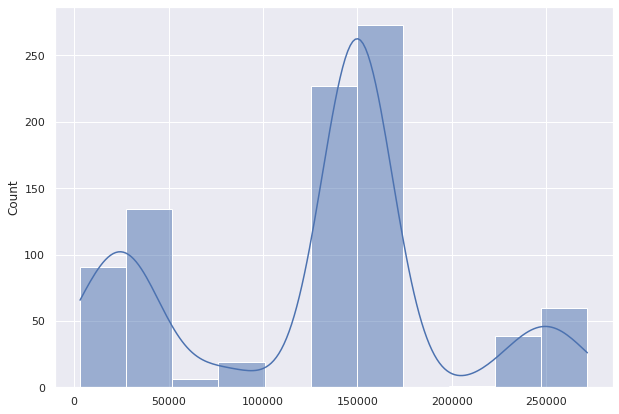

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(x=X[:,0], kde=True)

Учитывая, что мы знаем принадлежность каждого элемента датасета к определённой социальной группе, мы можем сделать декомпозицию этих распределений, и для каждой социальной группы построить свою собственную линейную модель.

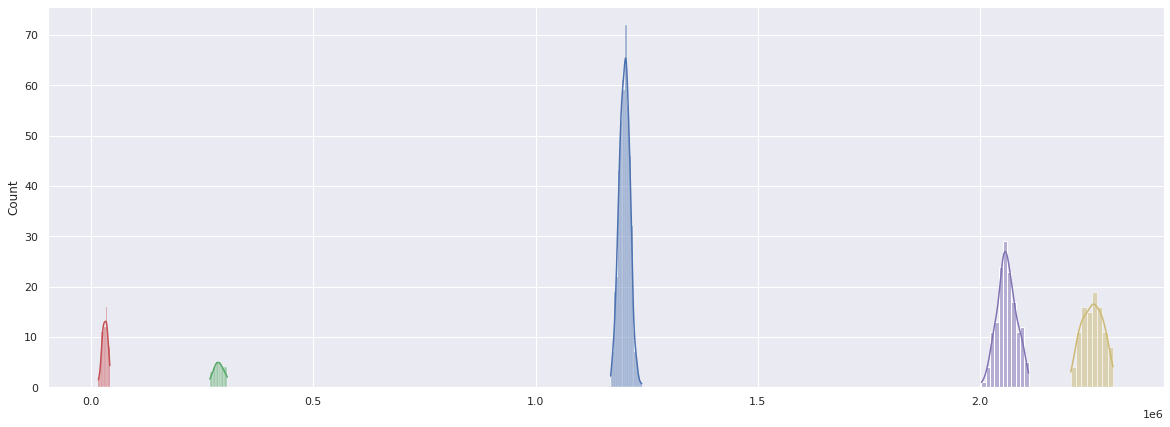

In [ ]:
plt.figure(figsize=(20,7))

log_sc = False
sns.histplot(x=retiree[:,1], kde=True, log_scale=log_sc, color='m')
sns.histplot(x=teenagers[:,1], kde=True, log_scale=log_sc, color='r')
sns.histplot(x=families[:,1], kde=True, log_scale=log_sc, color='g')
sns.histplot(x=young_machine_learners[:,1], kde=True, log_scale=log_sc, color='b')
sns.histplot(x=businessmen[:,1], kde=True, log_scale=log_sc, color='y')

Построим теперь для каждой группы свою собственную модель регрессии.

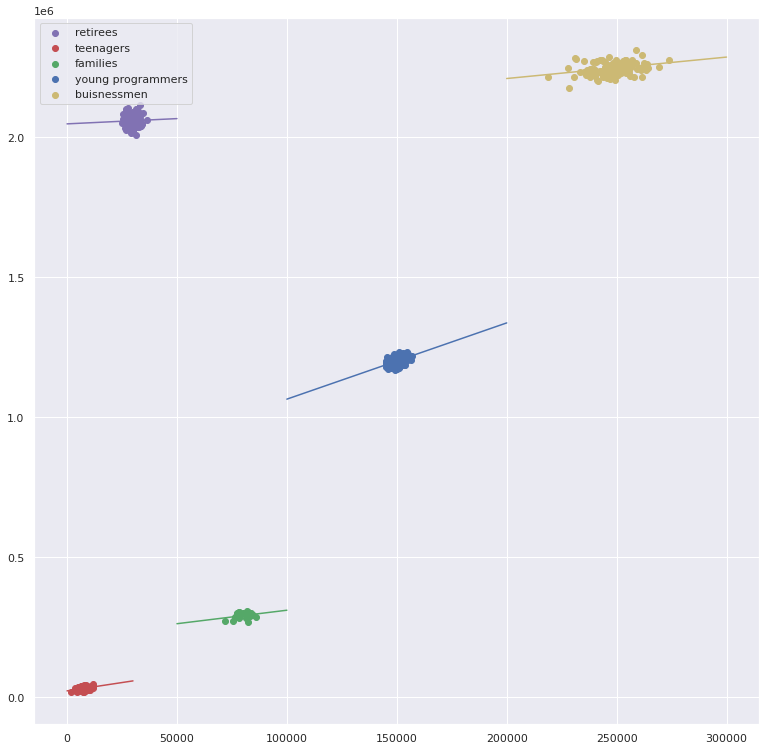

In [ ]:
# Обучение моделей регрессии для каждой социальной группы
LR_0 = LinearRegression().fit(retiree[:,0].reshape(-1,1), retiree[:,1])
LR_1 = LinearRegression().fit(teenagers[:,0].reshape(-1,1), teenagers[:,1])
LR_2 = LinearRegression().fit(families[:,0].reshape(-1,1), families[:,1])
LR_3 = LinearRegression().fit(young_machine_learners[:,0].reshape(-1,1), young_machine_learners[:,1])
LR_4 = LinearRegression().fit(businessmen[:,0].reshape(-1,1), businessmen[:,1])

# Визуализация построенных моделей
# Для каждой социальной группы примерно определим диапазон вариации признака
x_retiree = np.arange(0,50_000,2)
x_teenagers = np.arange(0, 30_000, 2)
x_families = np.arange(50_000, 100_000, 2)
x_young_machine_learners = np.arange(100_000, 200_000, 2)
x_businessmen = np.arange(200_000, 300_000, 2)

# Сделаем предсказания при помощи построенных моделей
preds_retiree = LR_0.predict(x_retiree.reshape(-1,1))
preds_teenagers = LR_1.predict(x_teenagers.reshape(-1,1))
preds_families = LR_2.predict(x_families.reshape(-1,1))
preds_young_machine_learners = LR_3.predict(x_young_machine_learners.reshape(-1,1))
preds_businessmen = LR_4.predict(x_businessmen.reshape(-1,1))

# Изобразим прямые, смоделированные нашими линейными регрессиями
plt.figure(figsize=(13,13))
plt.plot(x_retiree, preds_retiree, c='m')
plt.plot(x_teenagers, preds_teenagers, c='r')
plt.plot(x_families, preds_families, c='g')
plt.plot(x_young_machine_learners, preds_young_machine_learners, c='b')
plt.plot(x_businessmen, preds_businessmen, c='y')

# И добавим точки исходного датасета
plt.scatter(retiree[:,0], retiree[:,1], c='m', label='retirees')
plt.scatter(teenagers[:,0], teenagers[:,1], c='r', label='teenagers')
plt.scatter(families[:,0], families[:,1], c='g', label='families')
plt.scatter(young_machine_learners[:,0], young_machine_learners[:,1], c='b', label='young programmers')
plt.scatter(businessmen[:,0], businessmen[:,1], c='y', label='buisnessmen')

plt.legend()

Посчитаем значения метрик комплексной модели

In [ ]:
# Новые предсказания для точек нашего датасета:

preds_retiree = LR_0.predict(retiree[:,0].reshape(-1,1))
preds_teenagers = LR_1.predict(teenagers[:,0].reshape(-1,1))
preds_families = LR_2.predict(families[:,0].reshape(-1,1))
preds_young_machine_learners = LR_3.predict(young_machine_learners[:,0].reshape(-1,1))
preds_businessmen = LR_4.predict(businessmen[:,0].reshape(-1,1))

mse_score_new = np.mean([mse(retiree[:,1], preds_retiree), 
                     mse(teenagers[:,1], preds_teenagers),
                     mse(families[:,1], preds_families),
                     mse(young_machine_learners[:,1], preds_young_machine_learners),
                     mse(businessmen[:,1], preds_businessmen)])

mae_score_new = np.mean([mae(retiree[:,1], preds_retiree), 
                     mae(teenagers[:,1], preds_teenagers),
                     mae(families[:,1], preds_families),
                     mae(young_machine_learners[:,1], preds_young_machine_learners),
                     mae(businessmen[:,1], preds_businessmen)])

rmse_score_new = np.sqrt(rmse_score)

In [ ]:
mse_score/mse_score_new

1595.201189415023

In [ ]:
rmse_score/rmse_score_new

765.7899635653984

In [ ]:
mae_score/mae_score_new

44.94165397010166

In [ ]:
mae_score_new

10630.54895957965

Мы наблюдаем, что все три метрики серьёзно уменьшились. Это логично, ведь мы усложнили нашу модель и адаптировали её под конкретные социальные группы, то есть качество должно было вырасти, что и произошло.

Можем ли мы теперь полноценно интерпретировать полученные значения?
Всё еще нет, к сожалению. Как мы видим, полученные метрики отлично годятся для сравнения моделей между собой, а также для того, чтобы задать допустимую границу качества (например, скажем, что модель подходит для решения нашей задачи, если полученное значение `rmse` не превышает 700), но **без понимания масштаба** характерных значений ошибки, а также её допустимых границ, мы не можем, имея на руках лишь значение одной из этих метрик, сказать хорошо это или плохо.

Один из вариантов решения этой проблемы - отнормировать полученное значение, например, на характерное значение предсказываемой величины. Однако, есть метрики, для которых такая проблема не возникает просто по построению. Одна из таких метрик - $R^2$.



## 4. $R^2$

Коэффициент детерминации, или, т.н. r-квадрат.

Эта метрика необходима для оценки **доли дисперсии предсказываемой случайной величины, объясняемой моделью регрессии**.

Скажем, что у нас есть некоторая функция, значения которой необходимо научиться предсказывать. Назовём её $z(x)$. Пусть также есть модель регрессии, которая с некоторой точностью предсказывает значение $z(x)$. Модель регрессии назовём $f(x)$. И, само собой, есть некоторая ошибка предсказания. Её мы назовём $ϵ(x)$. Опустим аргументы и запишем следующее равенство:

$$ z = f + ϵ$$

Можно воспринимать последнюю запись, как запись для случайных величин $f$ и $ϵ$. Мы работаем в предположении, что среднее значение ошибки - нулевое. Саму ошибку очень часто принимают выбранной из нормального распределения.

Довольно здравым является предположение о независимости $f$ и  $ϵ$ в терминах случайных величин.

В случае этого предположения, по правилам теории вероятности, можно записать соответствующее равенство на дисперсии:

$$
Dz = Df + Dϵ
$$

Нас же интересует следующая величина:

$$R^2 = \frac{Df}{Dz} = \frac{Dz - Dϵ}{Dz} = 1 - \frac{Dϵ}{Dz}$$

Вспомнив определение дисперсии случайной величины, а также практические способы выборочной оценки [дисперсии](https://colab.research.google.com/drive/1BODfwl4F3c7h0CE-t88zavkZWyNe8n5G#scrollTo=x5FKOPxmoT9S) из математической статистики, несложно выписать выражения:

- Оценку дисперсии ошибки модели можно вычислить по формуле 

$Dϵ = \frac{1}{N}∑\limits_{i=1}^N(f(x_i) - y_i)^2$
- Оценку дисперсии случайной величины y можно получить по формуле 

$Dz = \frac{1}{N}∑\limits_{i=1}^N(y_i - \hat{y_i})^2$ где $\hat{y_i}$ - среднее значение всех $y_i$

Таким образом, мы приходим к окончательной записи $R^2$:

$$R^2 = 1 - \frac{∑\limits_{i=1}^N(f(x_i) - y_i)^2}{∑\limits_{i=1}^N(y_i - \hat{y_i})^2}$$

Замечание: значение вычитаемой дроби можно интерпретировать и иначе. Обратим внимание, что в числителе этой дроби (при условии деления и числителя и знаменателя на число $N$, которое в данном случае сократилось) стоит $MSE$. А в знаменателе - оценка дисперсии зависимой случайной величины, которую мы предсказываем. То есть по сути, в результате мы получаем *отнормированную* среднеквадратичную ошибку. А затем эту величину вычитаем из 1.

$R^2$ - это величина, которую необходимо **максимизировать**.

Все эти метрики представлены в библиотеке `sklearn` в модуле `metrics`
- $MAE$: `sklearn.metrics.mean_absolute_error`
- $MSE$: `sklearn.metrics.mean_squared_error`
- $RMSE$: получается вычислением квадратного корня из $MSE$ (`np.sqrt`)
- $R^2$: `sklearn.metrics.r2_score`

Хочу обратить внимание на то, что в силу особенностей реализации `r2_score` в `sklearn` иногда возникает ситуация, при которой `r2_score` отрицателен. Эта ситуация говорит о крайне низком качестве регрессии, худшем, чем простое усреднение всех результатов.

Проверим, что при усреднении всех значений по датасету и соответствующем предсказании значение `r2_score` действительно будет  равно 0.

In [ ]:
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
y_true = np.random.randn(100) + 2
y_pred = np.full_like(y_true, y_true.mean())
y_pred

array([2.10321893, 2.10321893, 2.10321893, 2.10321893, 2.10321893,
       2.10321893, 2.10321893, 2.10321893, 2.10321893, 2.10321893,
       2.10321893, 2.10321893, 2.10321893, 2.10321893, 2.10321893,
       2.10321893, 2.10321893, 2.10321893, 2.10321893, 2.10321893,
       2.10321893, 2.10321893, 2.10321893, 2.10321893, 2.10321893,
       2.10321893, 2.10321893, 2.10321893, 2.10321893, 2.10321893,
       2.10321893, 2.10321893, 2.10321893, 2.10321893, 2.10321893,
       2.10321893, 2.10321893, 2.10321893, 2.10321893, 2.10321893,
       2.10321893, 2.10321893, 2.10321893, 2.10321893, 2.10321893,
       2.10321893, 2.10321893, 2.10321893, 2.10321893, 2.10321893,
       2.10321893, 2.10321893, 2.10321893, 2.10321893, 2.10321893,
       2.10321893, 2.10321893, 2.10321893, 2.10321893, 2.10321893,
       2.10321893, 2.10321893, 2.10321893, 2.10321893, 2.10321893,
       2.10321893, 2.10321893, 2.10321893, 2.10321893, 2.10321893,
       2.10321893, 2.10321893, 2.10321893, 2.10321893, 2.10321

In [ ]:
r2_score(y_true, y_pred)

0.0

Также обращаю внимание на то, что в отличии от остальных метрик для `r2_score` **важен** порядок аргументов: (`y_true`, `y_pred`)

Если перепутаем, получим совсем другой результат:

In [ ]:
r2_score(y_pred,y_true)

0.0

# Дополнительная литература

- Дж. Себер. Линейный регрессионный анализ
- Pattern recognition and machine learning, ch.3, C.Bishop